## TP parte A - Ruleta, Crossover Mutacion

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Variables

In [2]:
PROB_CROSSOVER = 0.75
PROB_MUTACION = 0.05
CICLOS = 200
CANTIDAD_POBLACION = 10
COEF = 1073741823
ITERACIONES_IMPRIMIBLES = [20, 100, 200]

### Fitness y Objetivo

In [3]:
def convertirPoblacion(pob_ini, bin=True): # Pasar False para convertir a decimal
    pob_fin = []
    for numero in pob_ini:
        if bin:
            # convirtiendo cada número decimal en binario de 8 dígitos.
            pob_fin.append(format(numero,'030b'))
        else:
            pob_fin.append(int(str(numero), 2))
    return pob_fin

In [4]:
def funcionObjetivo(poblacion_binarios, coeficiente): #El coeficiente debería ser una constante en todo el programa
    poblacion = convertirPoblacion(poblacion_binarios, False)
    fun_objetivo = []
    for cromosoma in poblacion:
        fun_objetivo.append((cromosoma/coeficiente)**2)
    return fun_objetivo

In [5]:
def funcionFitness(poblacion_binarios, coeficiente):
    fitness = []
    fun_objetivo = funcionObjetivo(poblacion_binarios, coeficiente)
    for objetivo in fun_objetivo:
        fitness.append((objetivo/sum(fun_objetivo)))
    return fitness

#### Poblacion

In [6]:
def poblacionInicial():
  rng = np.random.default_rng() # Random Number Generator
  poblacion_decimal = rng.integers(low=0, high=COEF, size=CANTIDAD_POBLACION)
  return poblacion_decimal
#poblacion_decimal = poblacionInicial()
#poblacion_decimal

#### Binarios

In [7]:
poblacion_binarios = convertirPoblacion(poblacionInicial(), True)
#poblacion_binarios

### Tabla de datos

In [8]:
def generarDataFrame(pob_bin, coeficiente):
    pob_dec = convertirPoblacion(pob_bin, False)
    data = {'Decimales': pob_dec, 'Binarios': pob_bin, 
            'FuncionObjetivo':np.array(funcionObjetivo(pob_bin,coeficiente))}
    data_frame = pd.DataFrame(data)
    data_frame['Fitness'] = np.array(funcionFitness(pob_bin, coeficiente))
    return data_frame
#data_frame = generarDataFrame(poblacion_binarios, COEF)
#data_frame

#### Estadisticas Marco de datos

In [9]:
def generarEstadisticas(dataFrame):
    stats = {'Suma':[ dataFrame['FuncionObjetivo'].sum(), dataFrame['Fitness'].sum() ],
                'Promedio': [ dataFrame['FuncionObjetivo'].mean(), dataFrame['Fitness'].mean() ],
                'Máximo': [ dataFrame['FuncionObjetivo'].max(), dataFrame['Fitness'].max() ], 
                'Mínimo': [ dataFrame['FuncionObjetivo'].min(), dataFrame['Fitness'].min() ]}
    dataFrame_stats = pd.DataFrame(stats, index = ['Función objetivo', 'Fitness'])
    return dataFrame_stats, stats
#marcoDeDatos_stats = generarEstadisticas(data_frame)
#marcoDeDatos_stats

### Ruleta

In [10]:
def ruleta(pob_bin, coeficiente, cantidad_poblacion):
    # Asigna probabilidad basada en el fitness
    cantidad_poblacion
    cromosomas = np.array(pob_bin)
    probabilidades = np.array(funcionFitness(pob_bin, coeficiente))
    np.random.seed()
    binarios_ruleta = np.random.choice(cromosomas, size=int(cantidad_poblacion), p=probabilidades)
    binarios_ruleta = binarios_ruleta.tolist()
    return binarios_ruleta
#binarios_ruleta = ruleta(poblacion_binarios, COEF)
#binarios_ruleta

### Crossover

In [11]:
def crossover(poblacion_binarios, prob_corssover):
    hijos_crossover = []
    cantidad_poblacion = len(poblacion_binarios)
    genes = len(poblacion_binarios[0])
    poblacion_binarios = np.array(poblacion_binarios)
    for i in range(0, cantidad_poblacion, 2):
        opciones = [True, False]
        np.random.seed()
        # Probabilidades de cada opción
        prob_cross = np.array([prob_corssover, (1-prob_corssover)])
        cross = np.random.choice(opciones, size=1, p=prob_cross)
        if cross[0]:
            posiciones = [x for x in range(0, genes)]
            probCorte = [(1/genes) for x in range(0, genes)]
            # Devuelve ndarray de 1 elemento
            corte = np.random.choice(posiciones, size=1, p=probCorte)
            posicionCorte = corte[0]
            primerTiraGenesPadre1 = poblacion_binarios[i][0:posicionCorte]
            segundaTiraGenesPadre1 = poblacion_binarios[i][posicionCorte:genes]
            primerTiraGenesPadre2 = poblacion_binarios[i+1][0:posicionCorte]
            segundaTiraGenesPadre2 = poblacion_binarios[i+1][posicionCorte:genes]
            hijos_crossover.append(primerTiraGenesPadre1 + segundaTiraGenesPadre2)  # Hijo 1
            hijos_crossover.append(primerTiraGenesPadre2 + segundaTiraGenesPadre1)  # Hijo 2
        else:
            hijos_crossover.append(poblacion_binarios[i])
            hijos_crossover.append(poblacion_binarios[i+1])
    return hijos_crossover
#binarios_crossover = crossover(binarios_ruleta, PROB_CROSSOVER)
#binarios_crossover

### Mutacion

In [12]:
def mutacion(hijos_binarios, prob_mutacion):
        hijos_mutados = []
        genes = len(str(hijos_binarios[0]))
        for hijo in hijos_binarios:
            opciones = [True, False]
            np.random.seed()
            # Probabilidades de cada opción
            prob_mut = np.array([prob_mutacion, (1-prob_mutacion)])
            mut = np.random.choice(opciones, size=1, p=prob_mut)
            if mut[0]:
                posiciones = [x for x in range(0, genes)]
                probMutacion = [1/genes for x in range(0, genes)]
                # Devuelve ndarray de 1 elemento
                posicionMutacion = np.random.choice(posiciones, size=1, p=probMutacion)
                posicionMutacion = posicionMutacion[0]
                if hijo[posicionMutacion] == '0':
                    hijo = hijo[:posicionMutacion] + '1' + hijo[posicionMutacion+1:]
                else:
                    hijo = hijo[:posicionMutacion] + '0' + hijo[posicionMutacion+1:]
            hijos_mutados.append(hijo)
        return hijos_mutados
#mutados = mutacion(binarios_crossover, PROB_MUTACION)
#mutados

### Torneo

In [13]:
def torneo(poblacion_binarios, coeficiente, cantidad_poblacion):
    binarios_torneo = []
    fitness = np.array(funcionFitness(poblacion_binarios, coeficiente))
    poblacion_binarios = np.array(poblacion_binarios)
    for i in range(0, cantidad_poblacion):
        posiblesCantidades = [x for x in range(1, (cantidad_poblacion+1))]
        np.random.seed()
        cantidadMiembrosTorneo = np.random.choice(posiblesCantidades, size=1)
        # Trabaja directamente con los fitness de los cromósomas
        miembrosTorneo = np.random.choice(fitness, size=cantidadMiembrosTorneo[0], replace=False)
        ganador = np.amax(miembrosTorneo)
        indiceGanador = np.where(fitness == ganador)  # retorna ndarray
        cromosomaGanador = poblacion_binarios[indiceGanador[0][0]]
        binarios_torneo.append(cromosomaGanador)
    return binarios_torneo
#binarios_torneo = torneo(poblacion_binarios, COEF)
#binarios_torneo

### Elitismo

In [14]:
def elitismo(poblacion_binarios, cantidad, coeficiente):
    fitness = funcionFitness(poblacion_binarios, coeficiente)
    elites = []
    for i in range(0, cantidad):
        ganador = max(fitness)
        indiceGanador = fitness.index(ganador)
        cromosomaGanador = poblacion_binarios[indiceGanador]
        elites.append(cromosomaGanador)
        fitness.remove(ganador)
    return elites
#elites = elitismo(poblacion_binarios, 2, COEF)
#elites

## Iteracion

### Graficos

In [15]:
def hacerGrafico(estadisticas, iteracion):
    estadisticas["Iteración"]=[x for x in range(1,iteracion+1)]
    plt.figure(figsize=(20,20))
    plt.plot(estadisticas["Iteración"], estadisticas["Máximo"], 'b.-', label="Máximo")
    plt.plot(estadisticas["Iteración"], estadisticas["Mínimo"], 'r.-', label="Mínimo")
    plt.plot(estadisticas["Iteración"], estadisticas["Promedio"], 'g.-', label="Promedio")
    plt.legend()
    plt.title("Gráfica iteración: " + str(iteracion))
    plt.xticks(estadisticas["Iteración"][::1])
    plt.yticks(np.arange(0, 1.01, step=0.025))
    plt.xlabel("Iteraciones")
    plt.ylabel("F. Objetivo")
    plt.show()

### Iteracion

CASO A: Método selección ruleta


,Suma,Promedio,Máximo,Mínimo
Función objetivo,8.228243,0.822824,0.845610,0.789100
Fitness,1.000000,0.100000,0.102769,0.095901


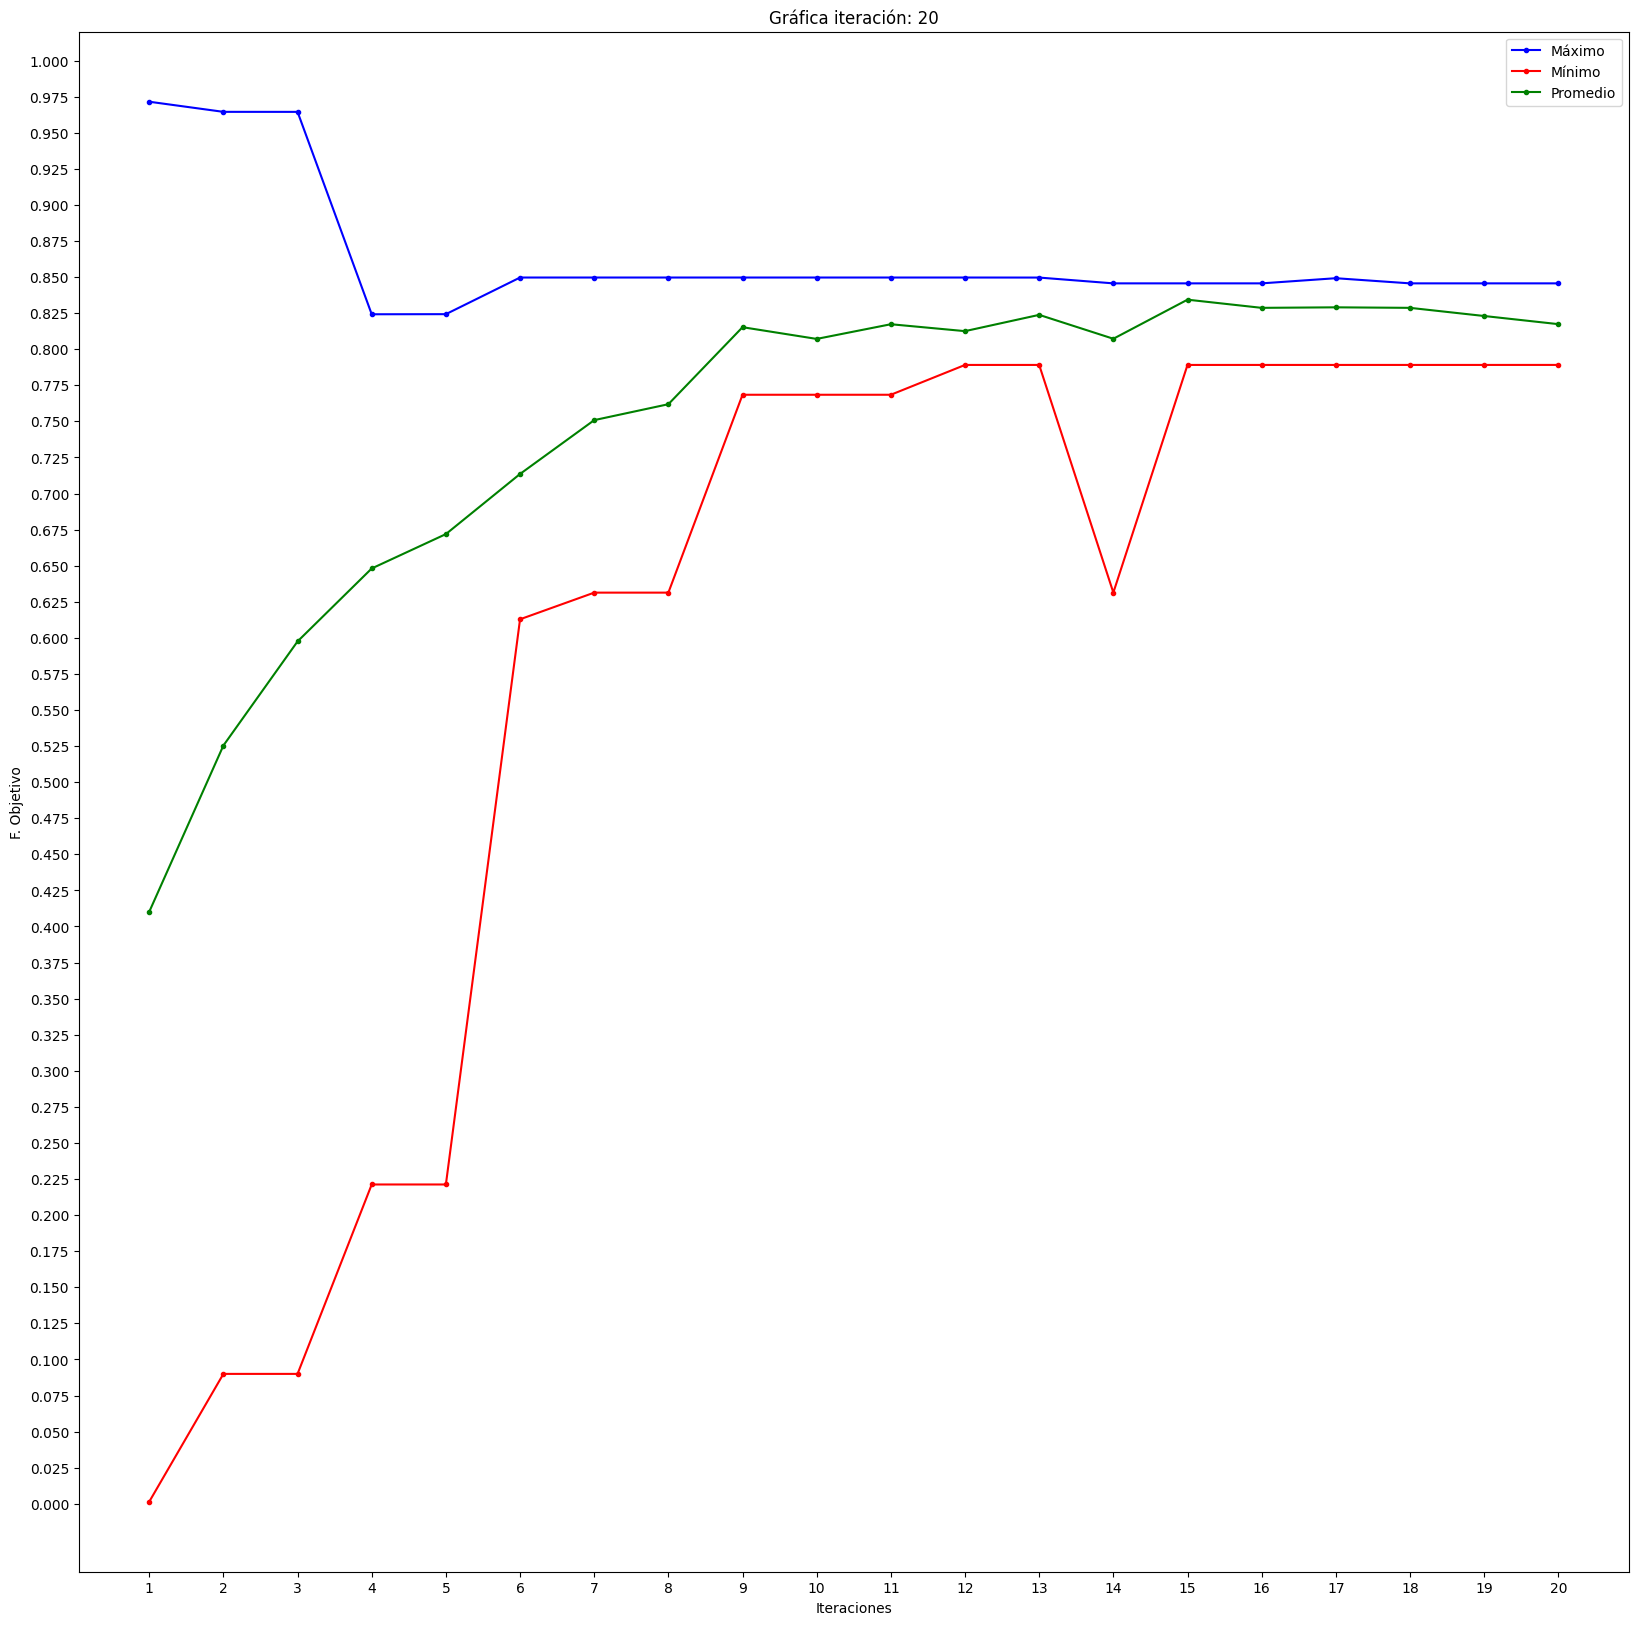

,Suma,Promedio,Máximo,Mínimo
Función objetivo,8.456840,0.845684,0.845718,0.845605
Fitness,1.000000,0.100000,0.100004,0.099991


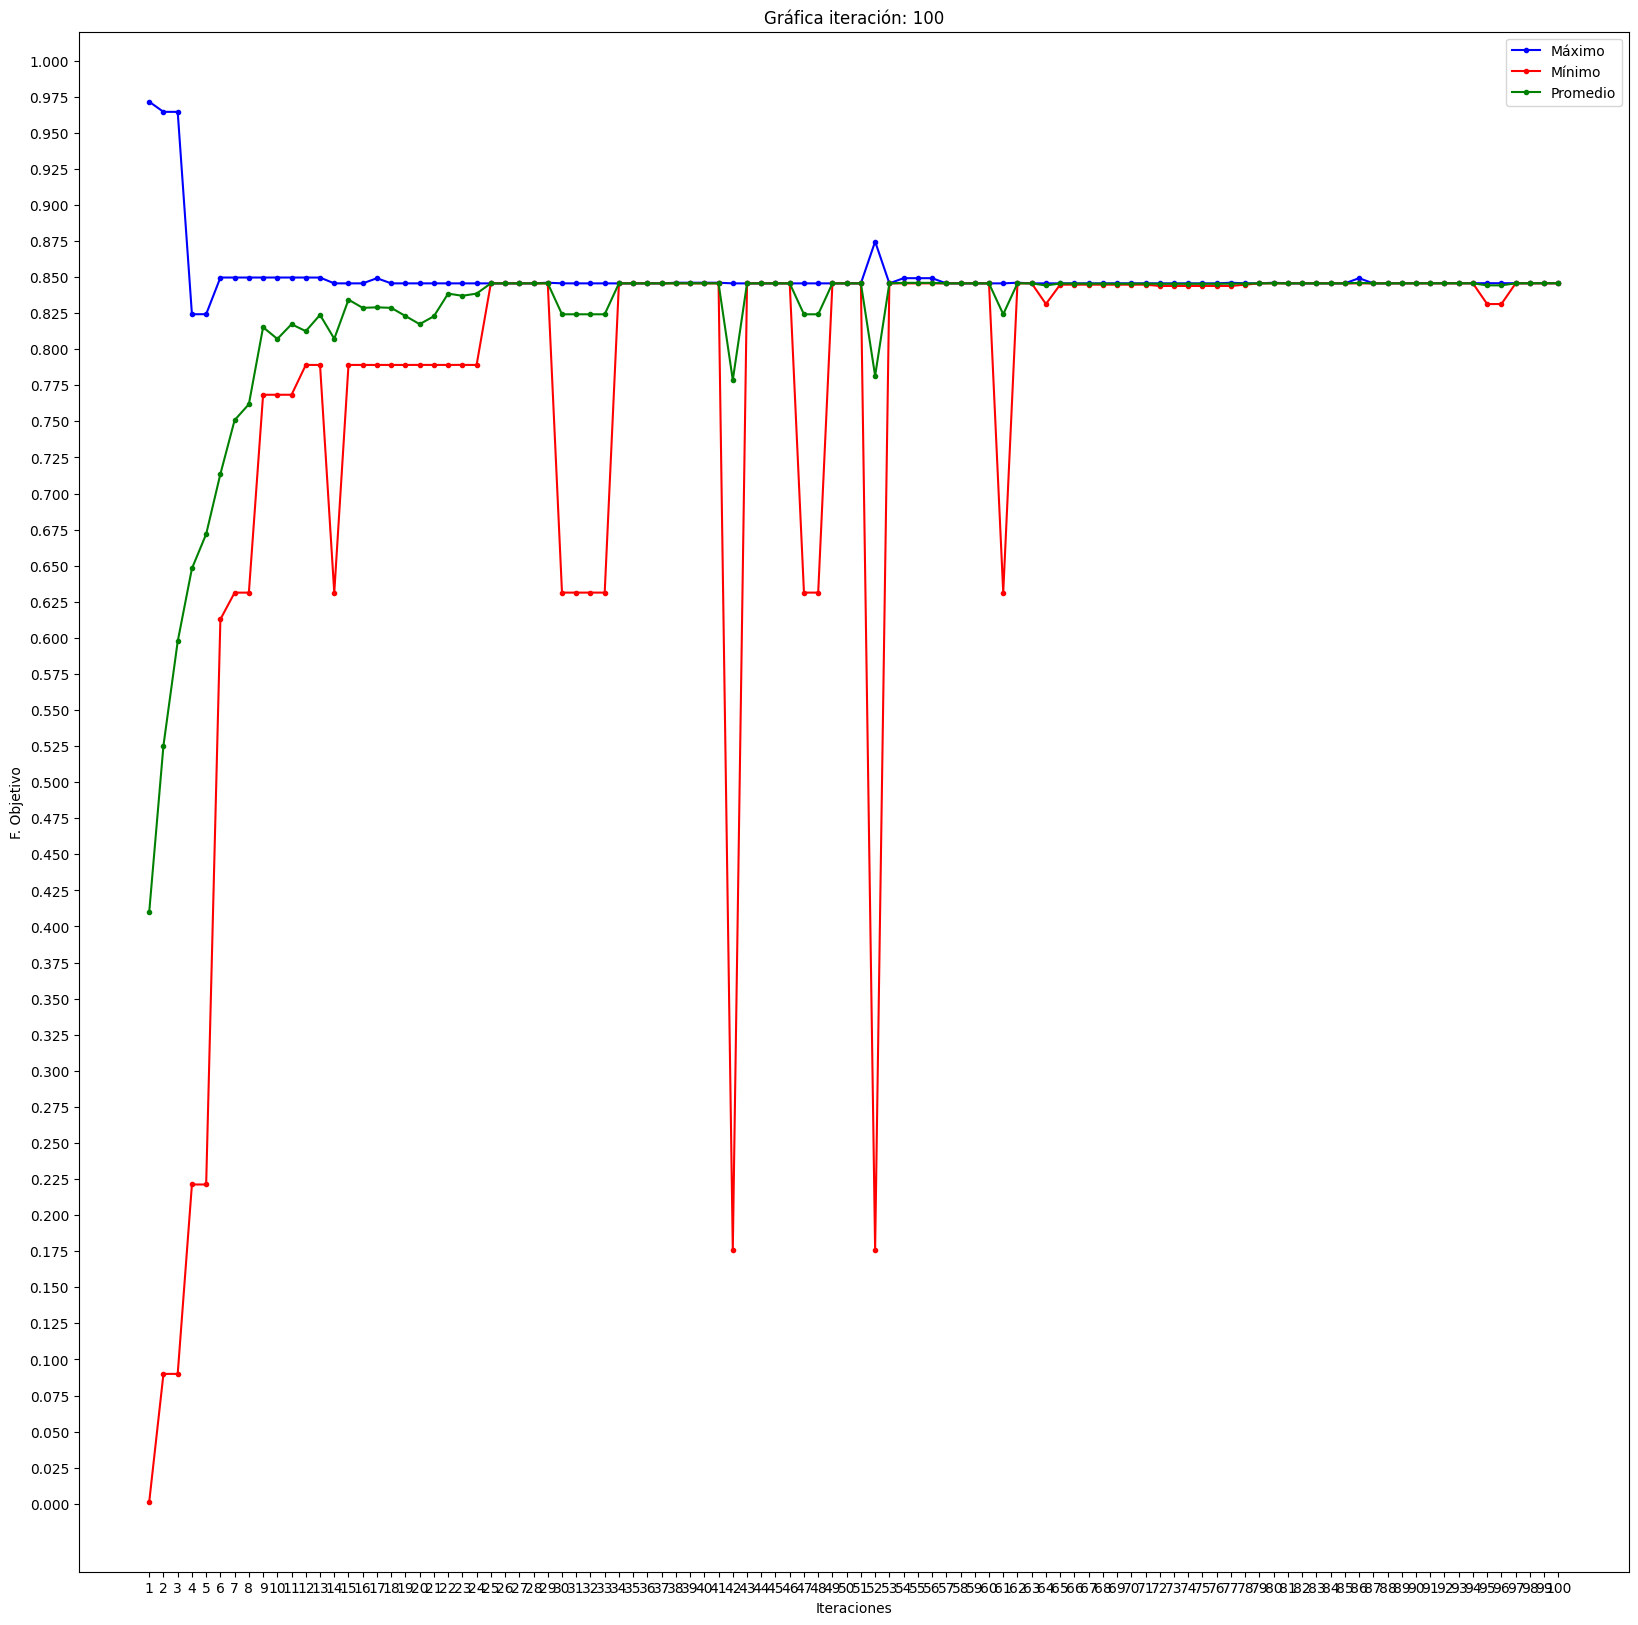

,Suma,Promedio,Máximo,Mínimo
Función objetivo,8.544178,0.854418,0.968422,0.191152
Fitness,1.000000,0.100000,0.113343,0.022372


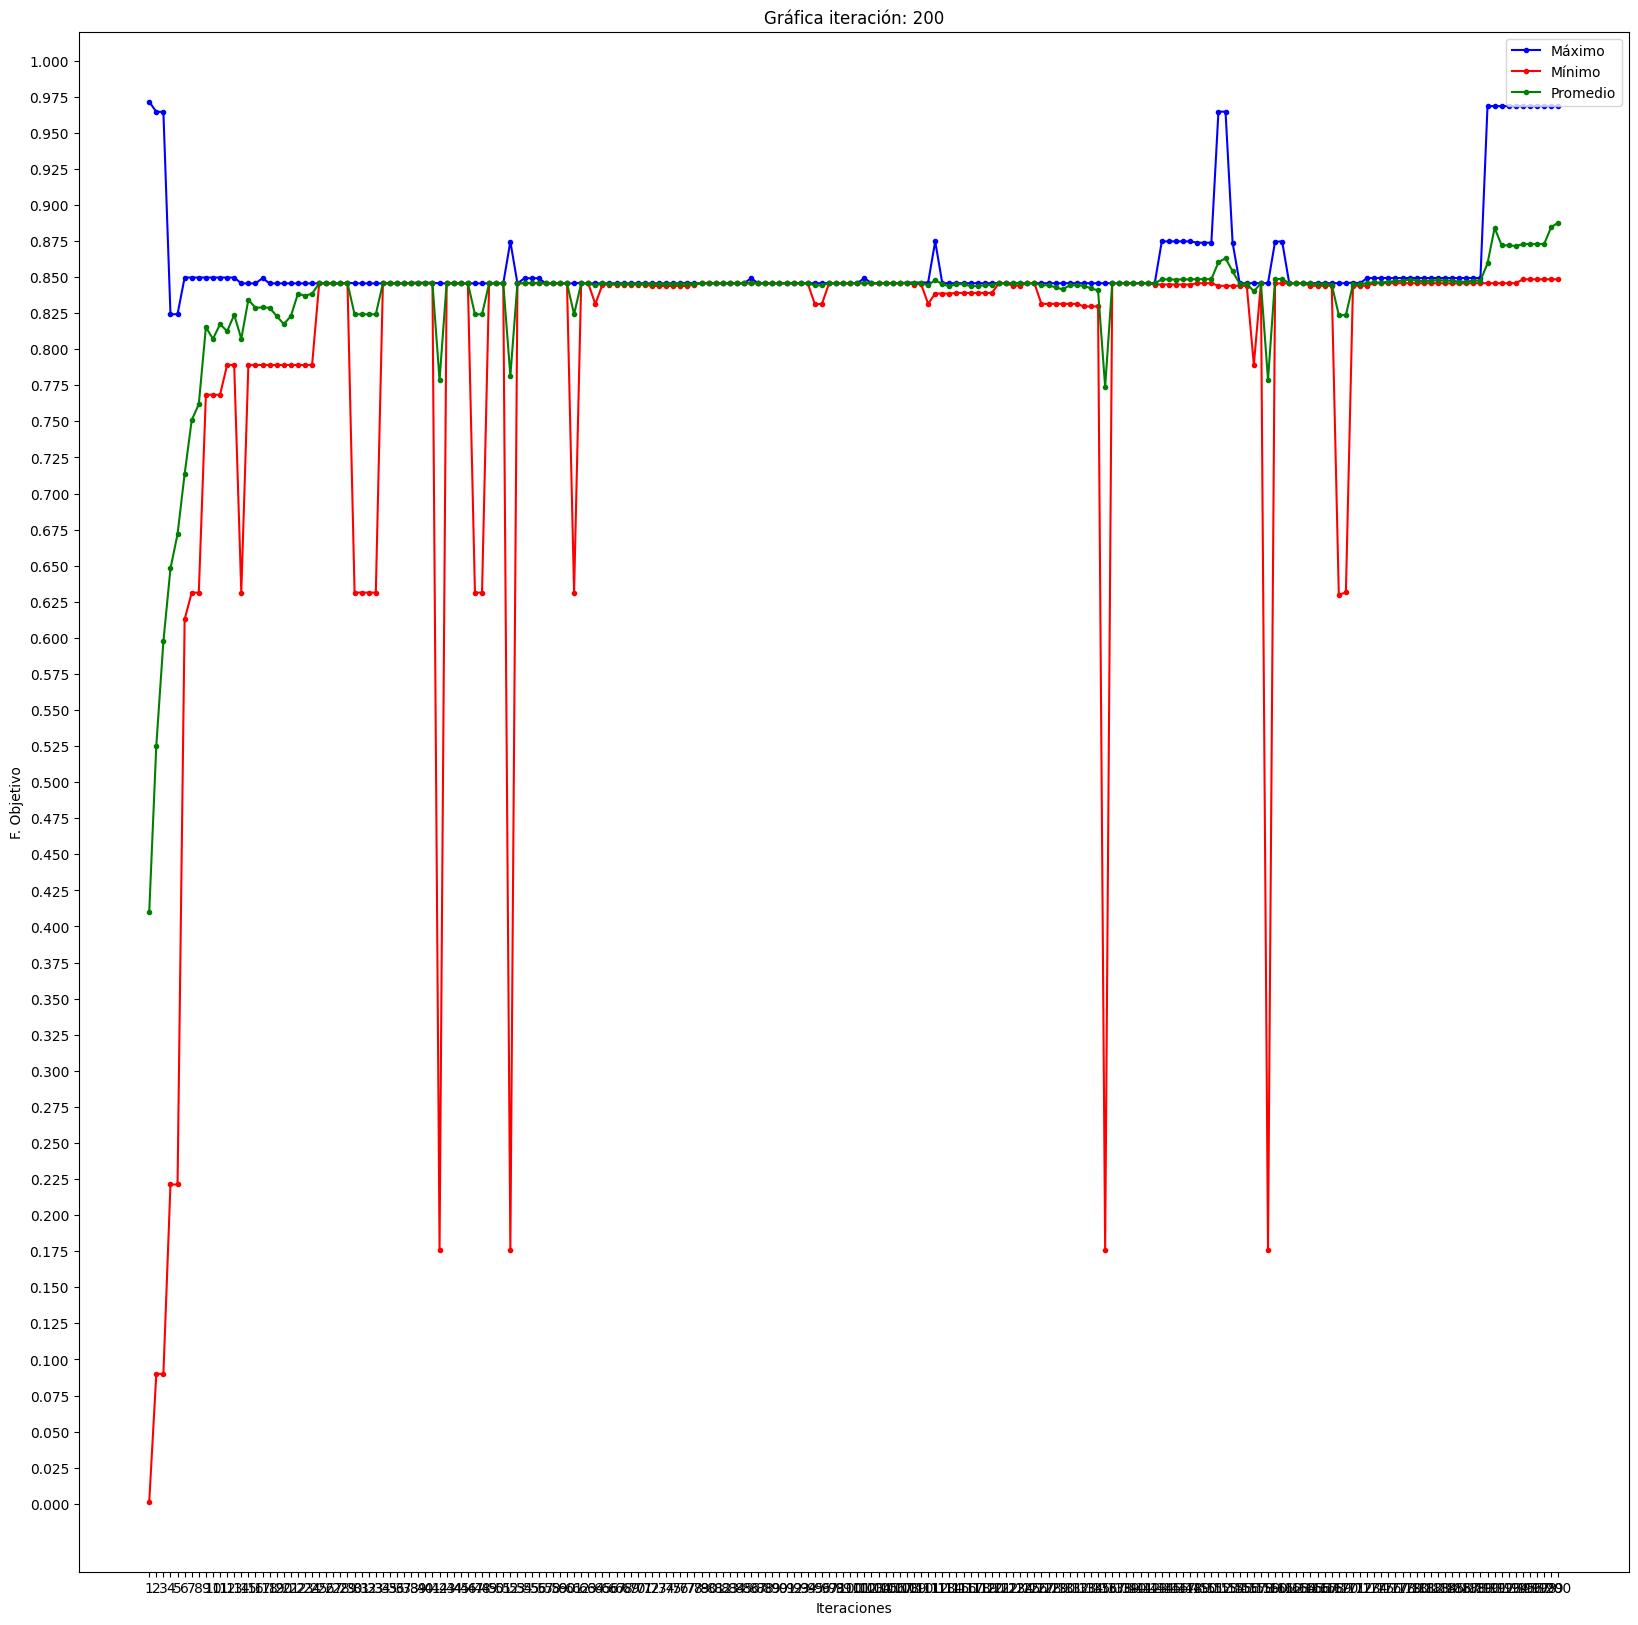

CASO B: Método selección torneo


,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.899237,0.989924,0.989924,0.989924
Fitness,1.000000,0.100000,0.100000,0.100000


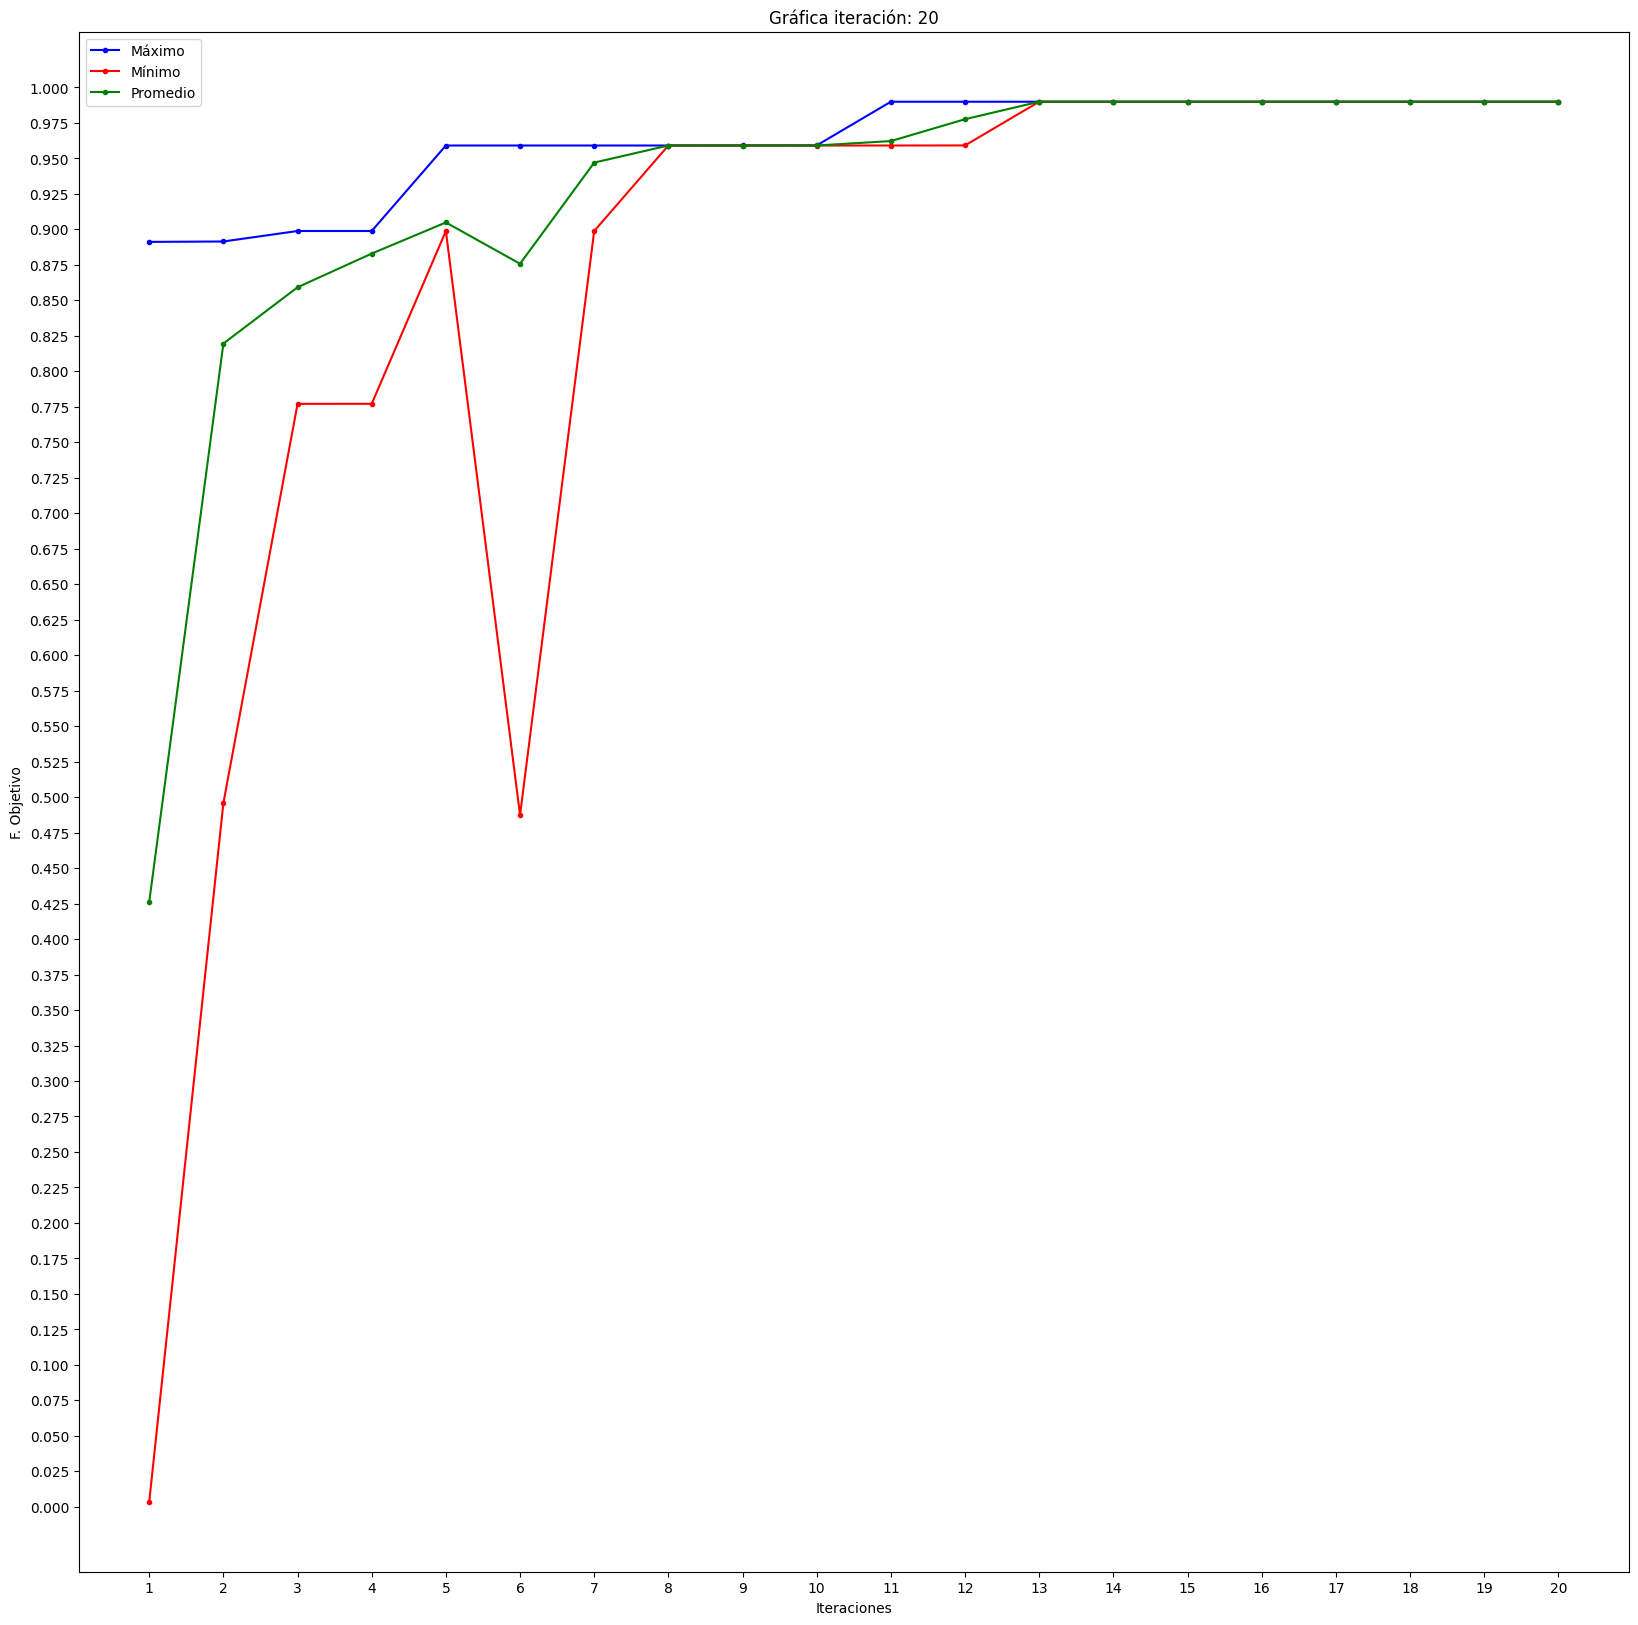

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.765324,0.976532,0.999969,0.765598
Fitness,1.000000,0.100000,0.102400,0.078400


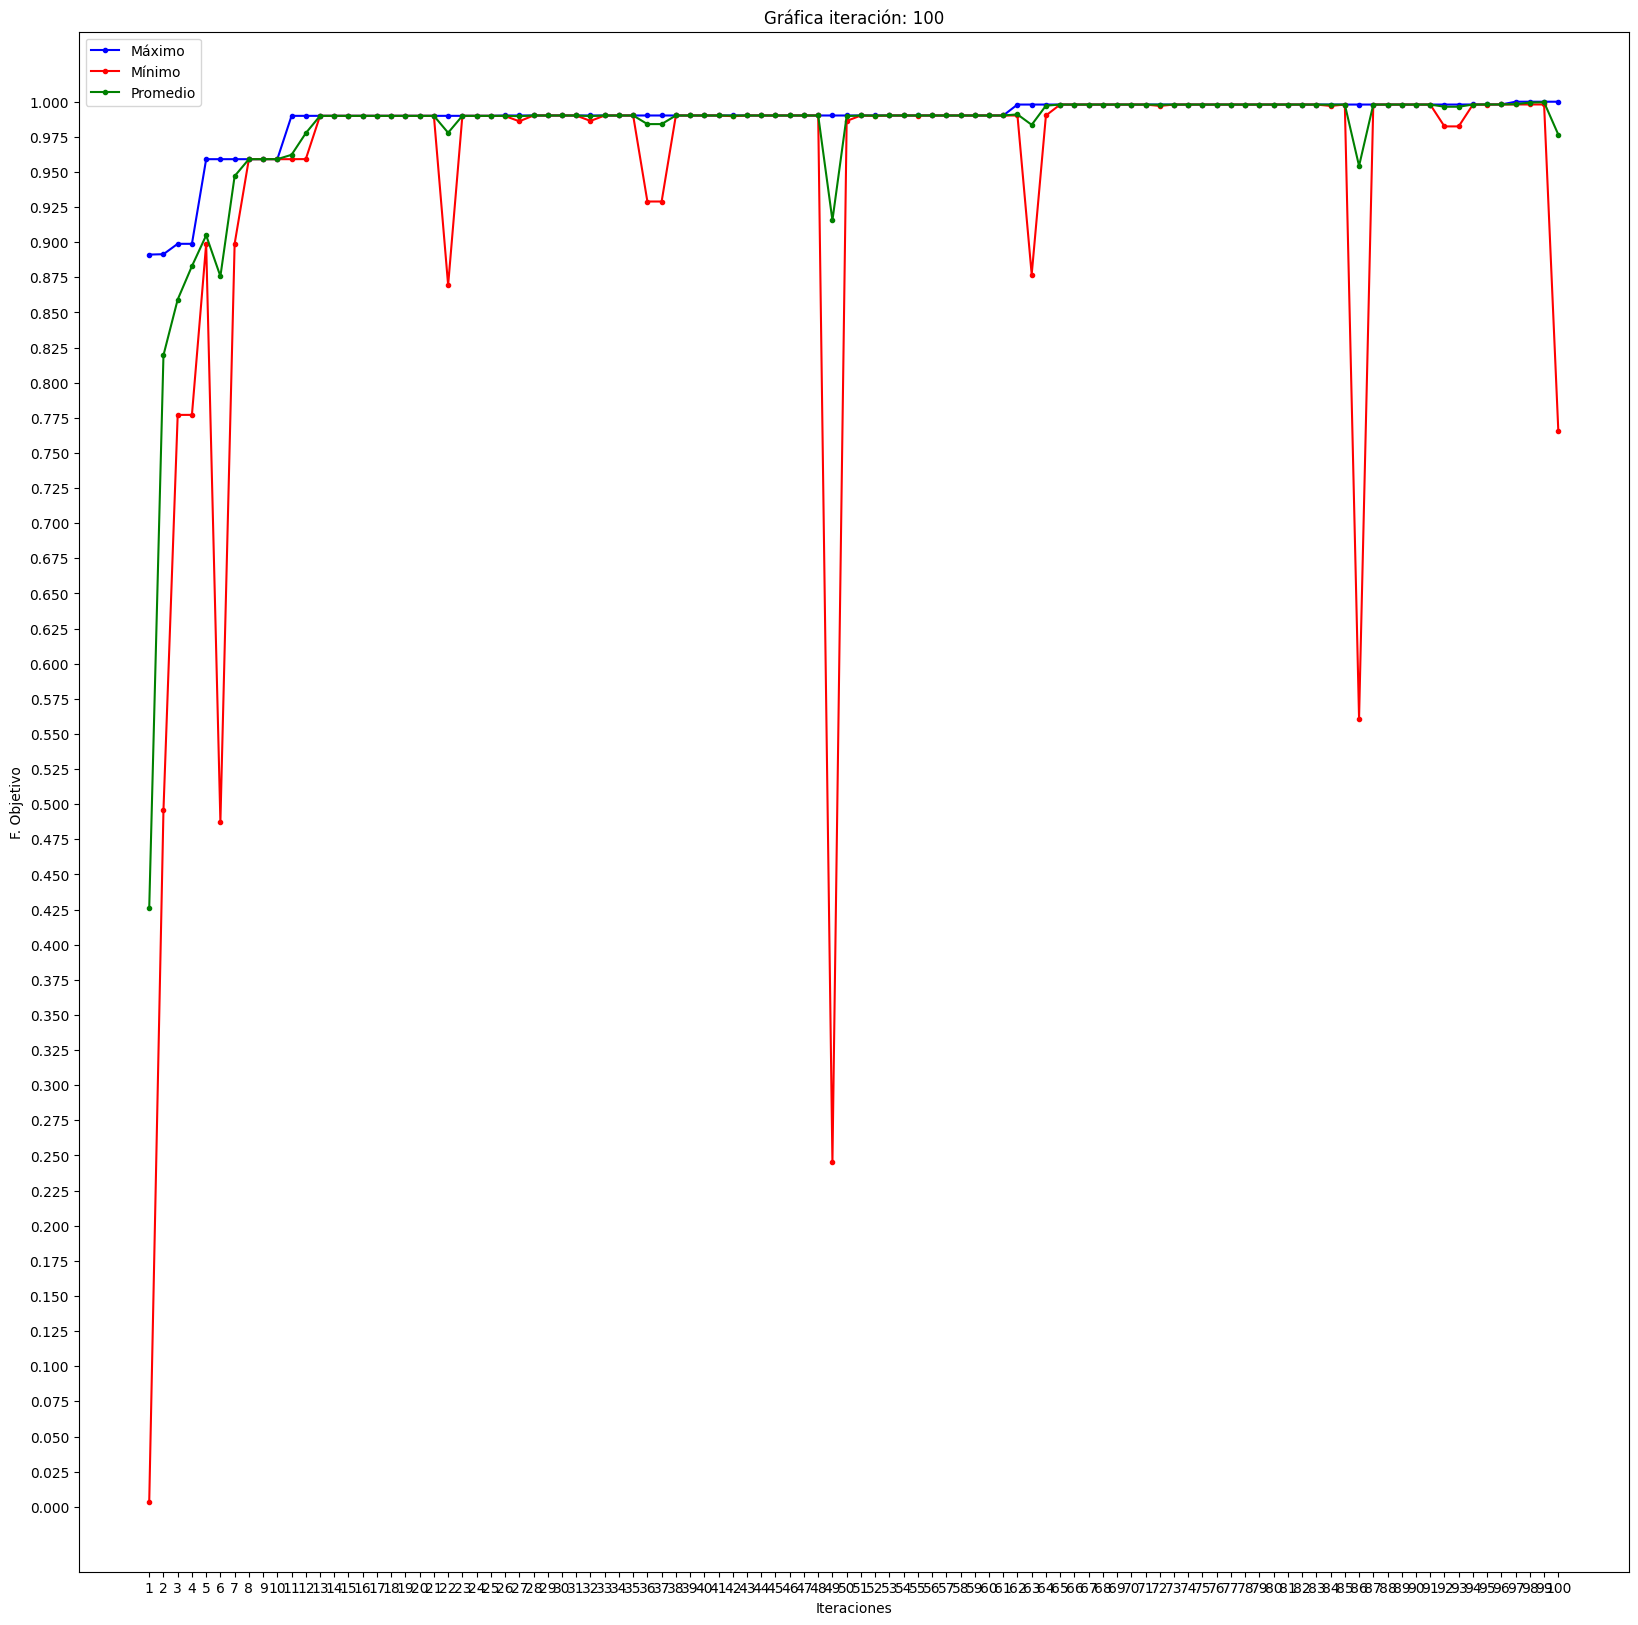

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.560547,0.956055,1.000000,0.562500
Fitness,1.000000,0.100000,0.104597,0.058836


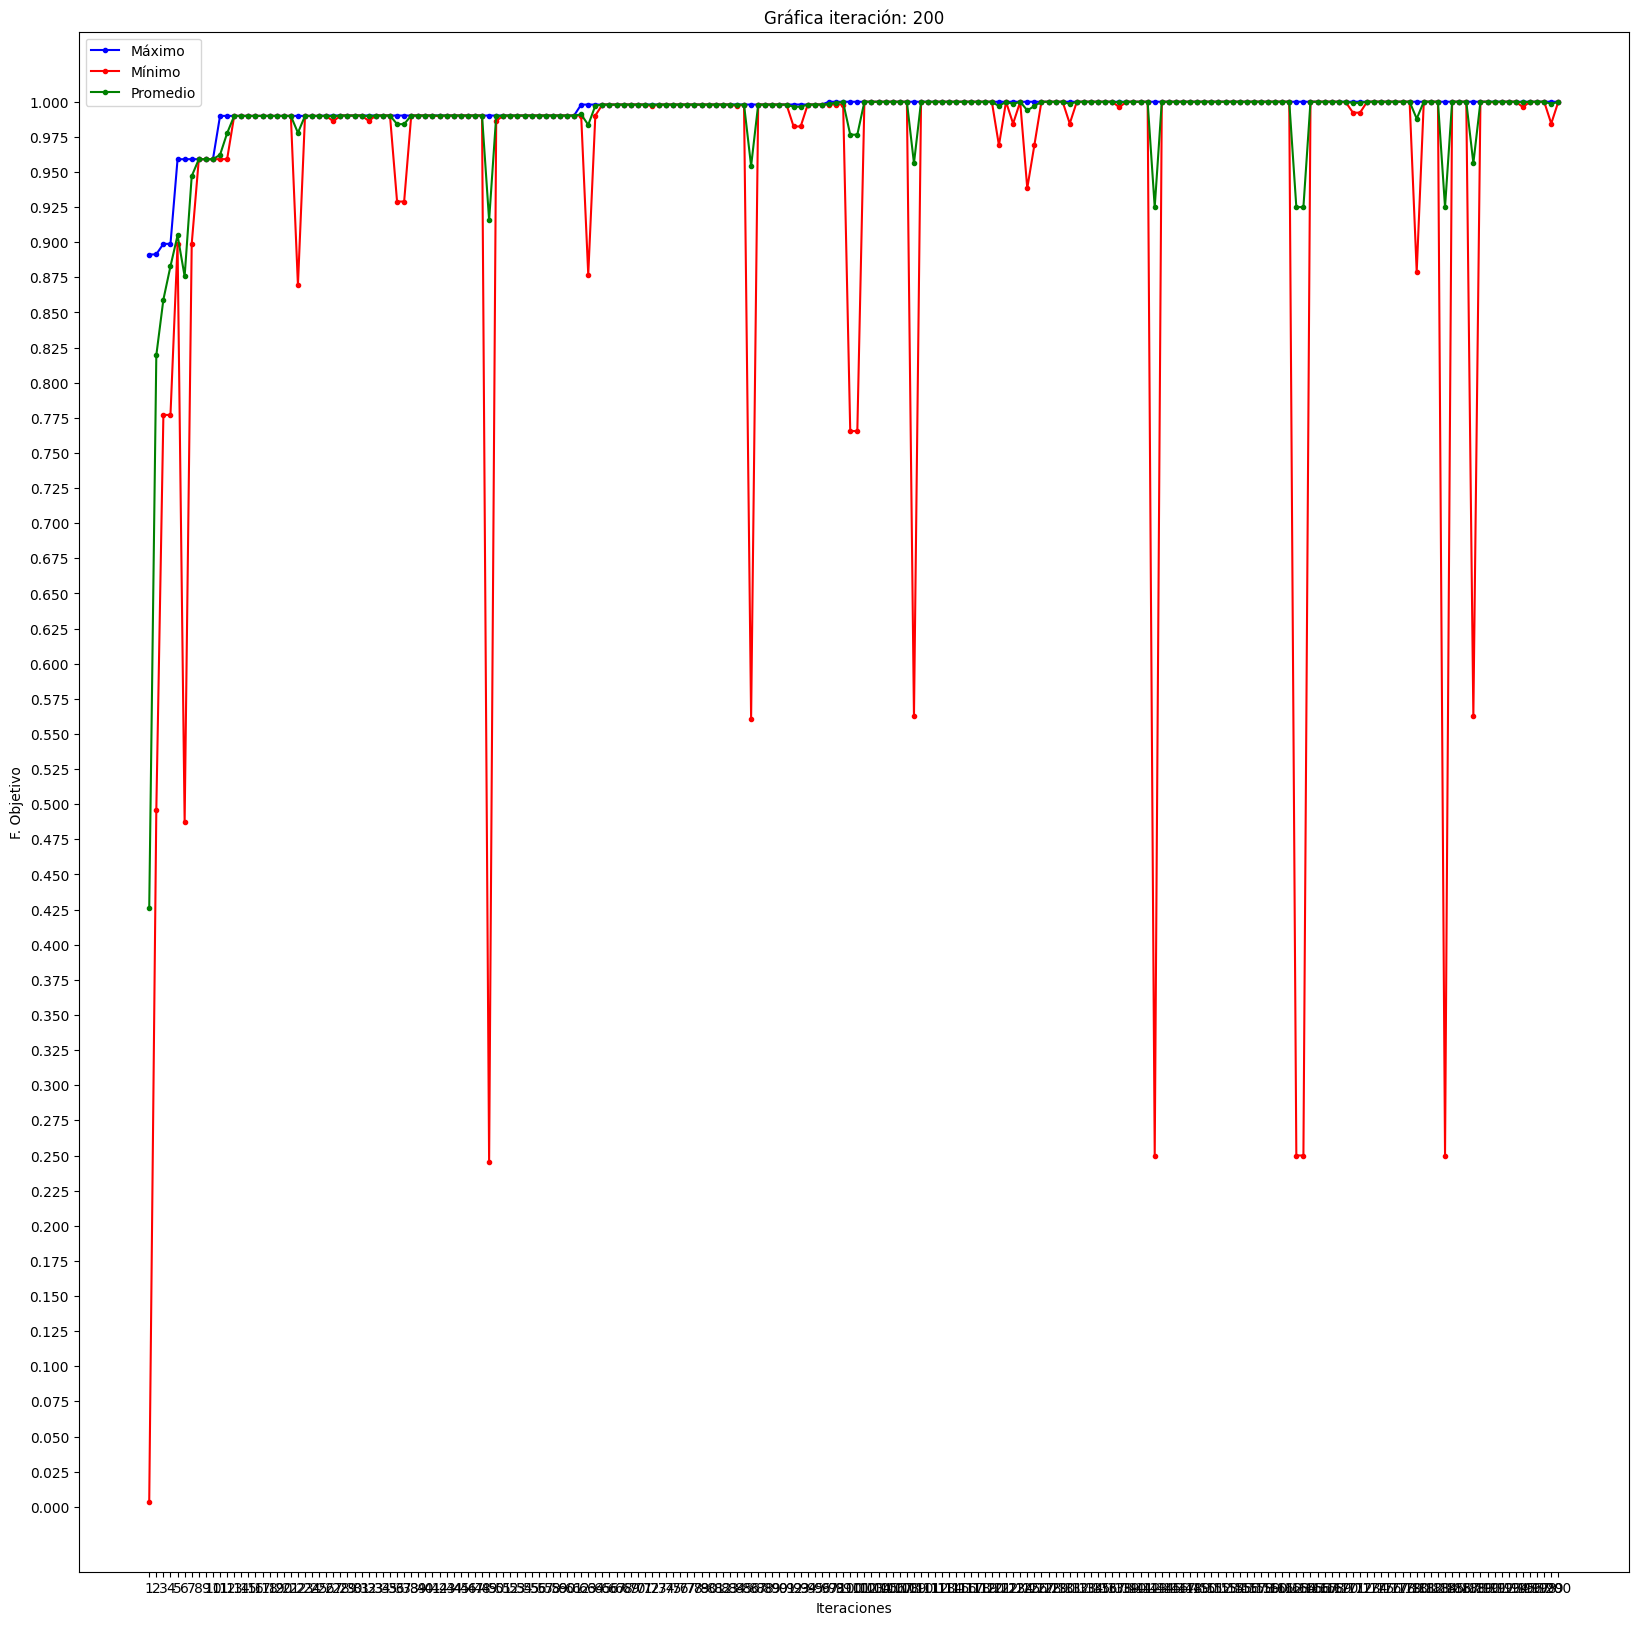

CASO C: Método selección Ruleta con elitismo


'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.544219,0.954422,0.963592,0.933043
Fitness,1.000000,0.100000,0.100961,0.097760


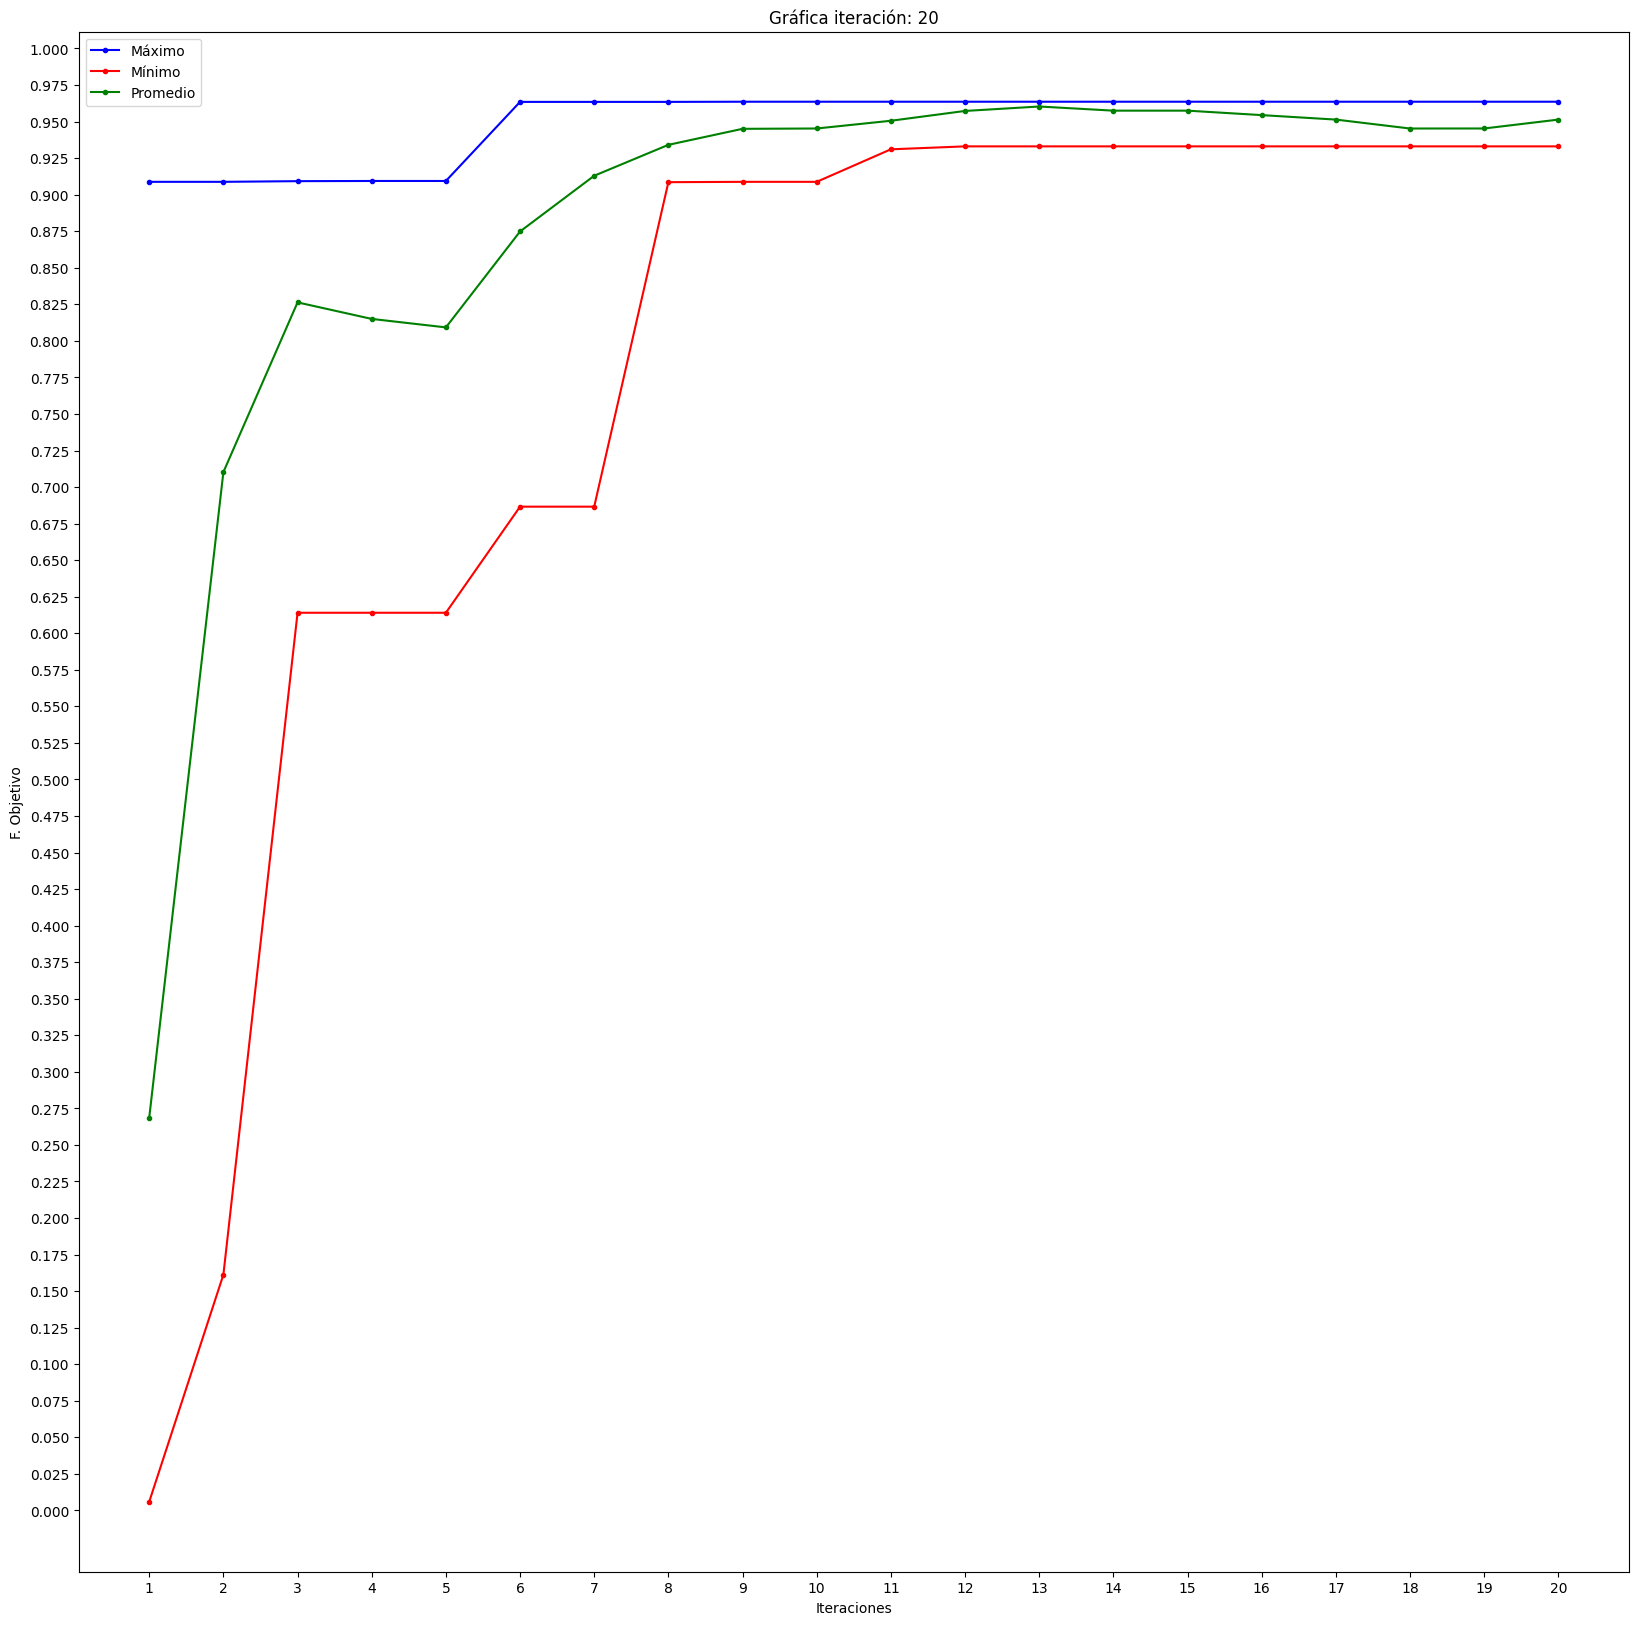

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.870273,0.987027,0.987707,0.986736
Fitness,1.000000,0.100000,0.100069,0.099970


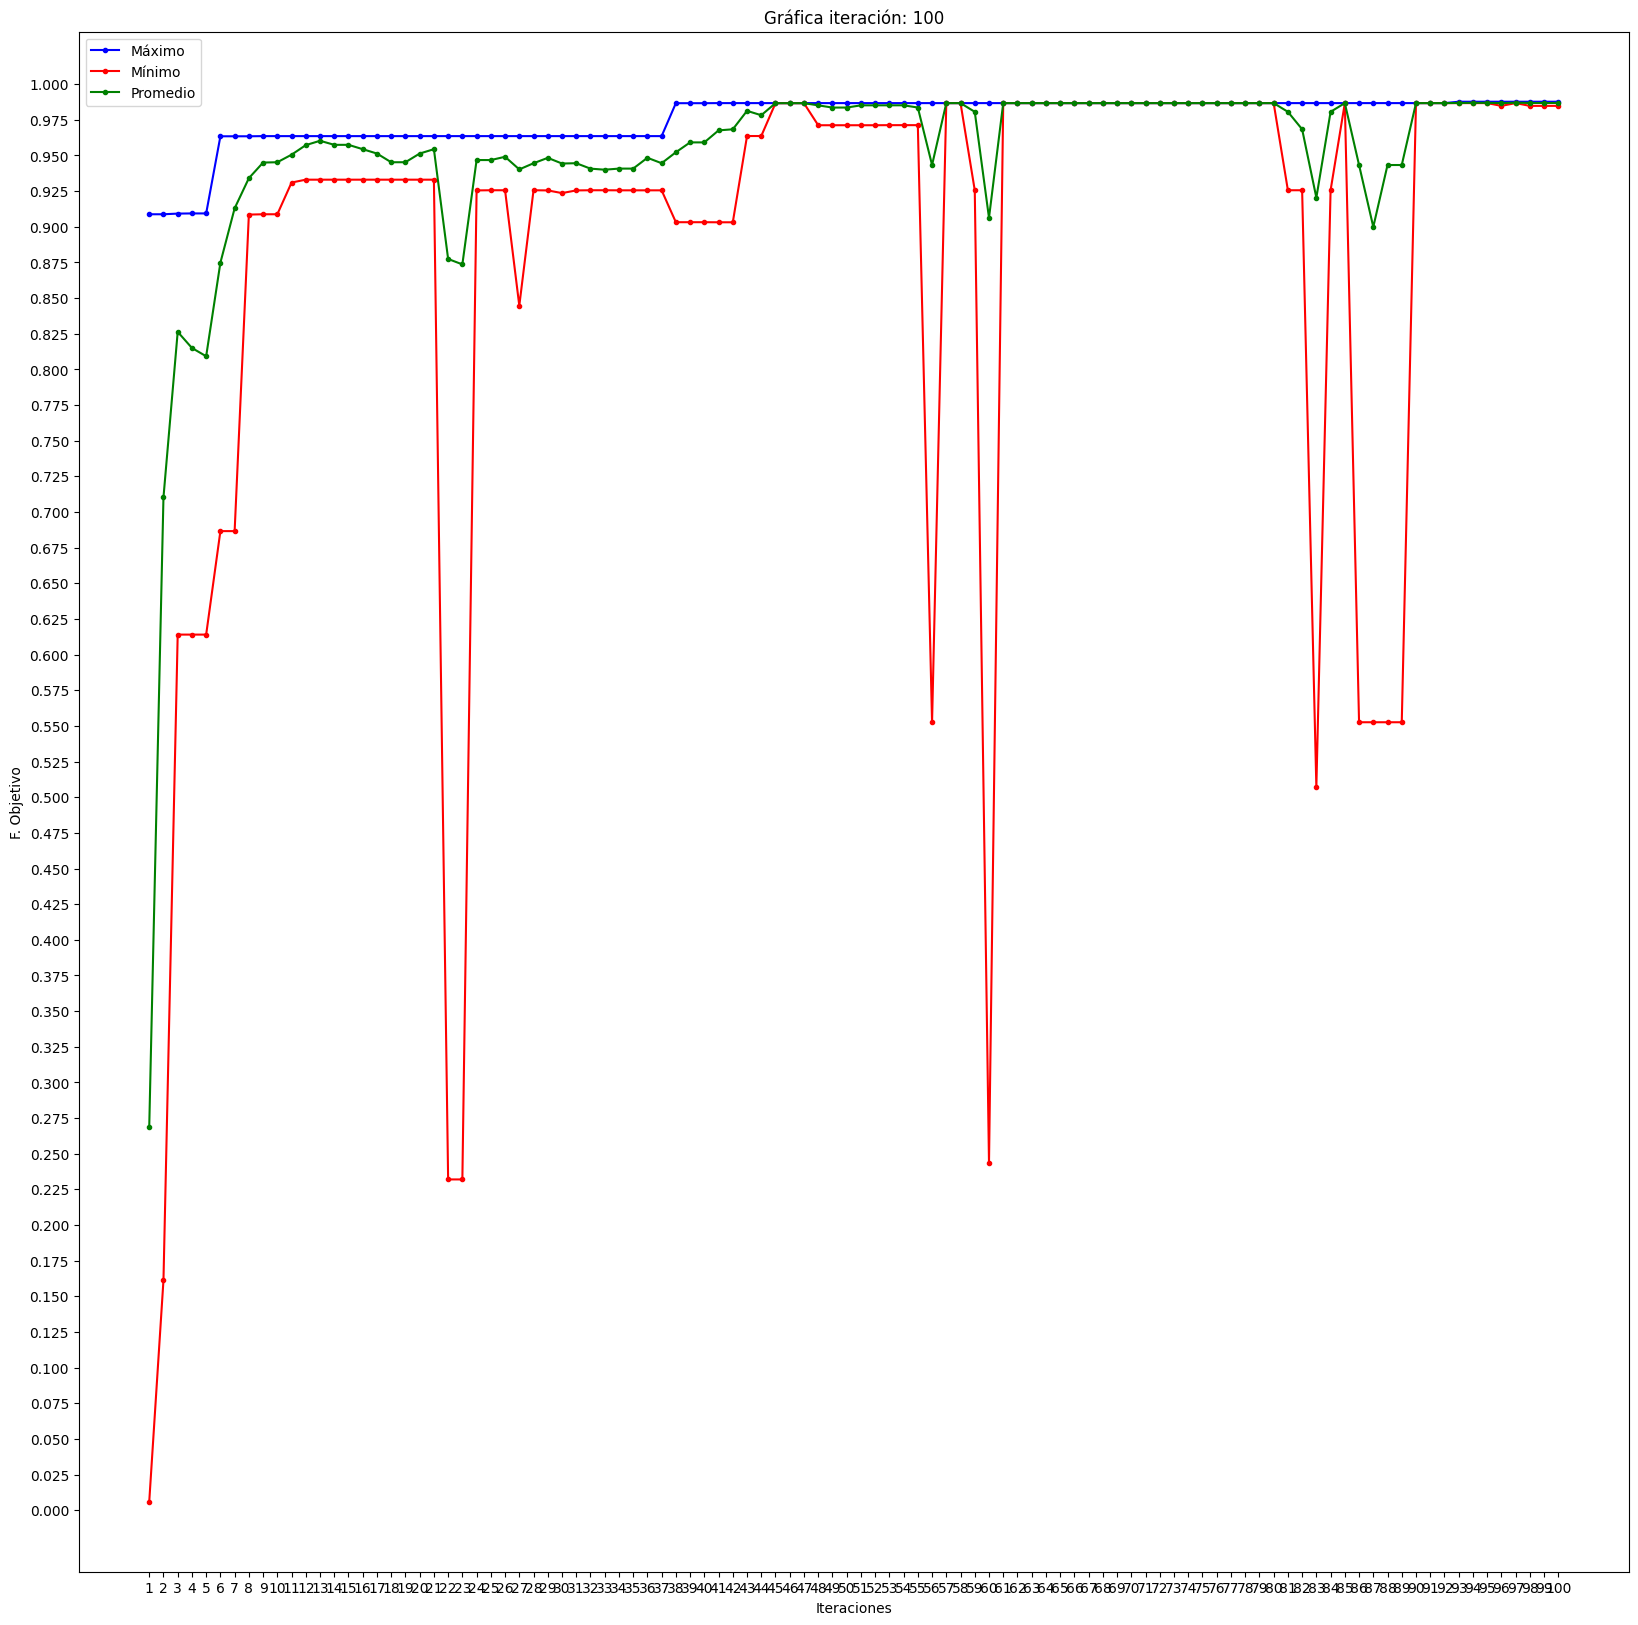

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.983984,0.998398,0.998398,0.998398
Fitness,1.000000,0.100000,0.100000,0.100000


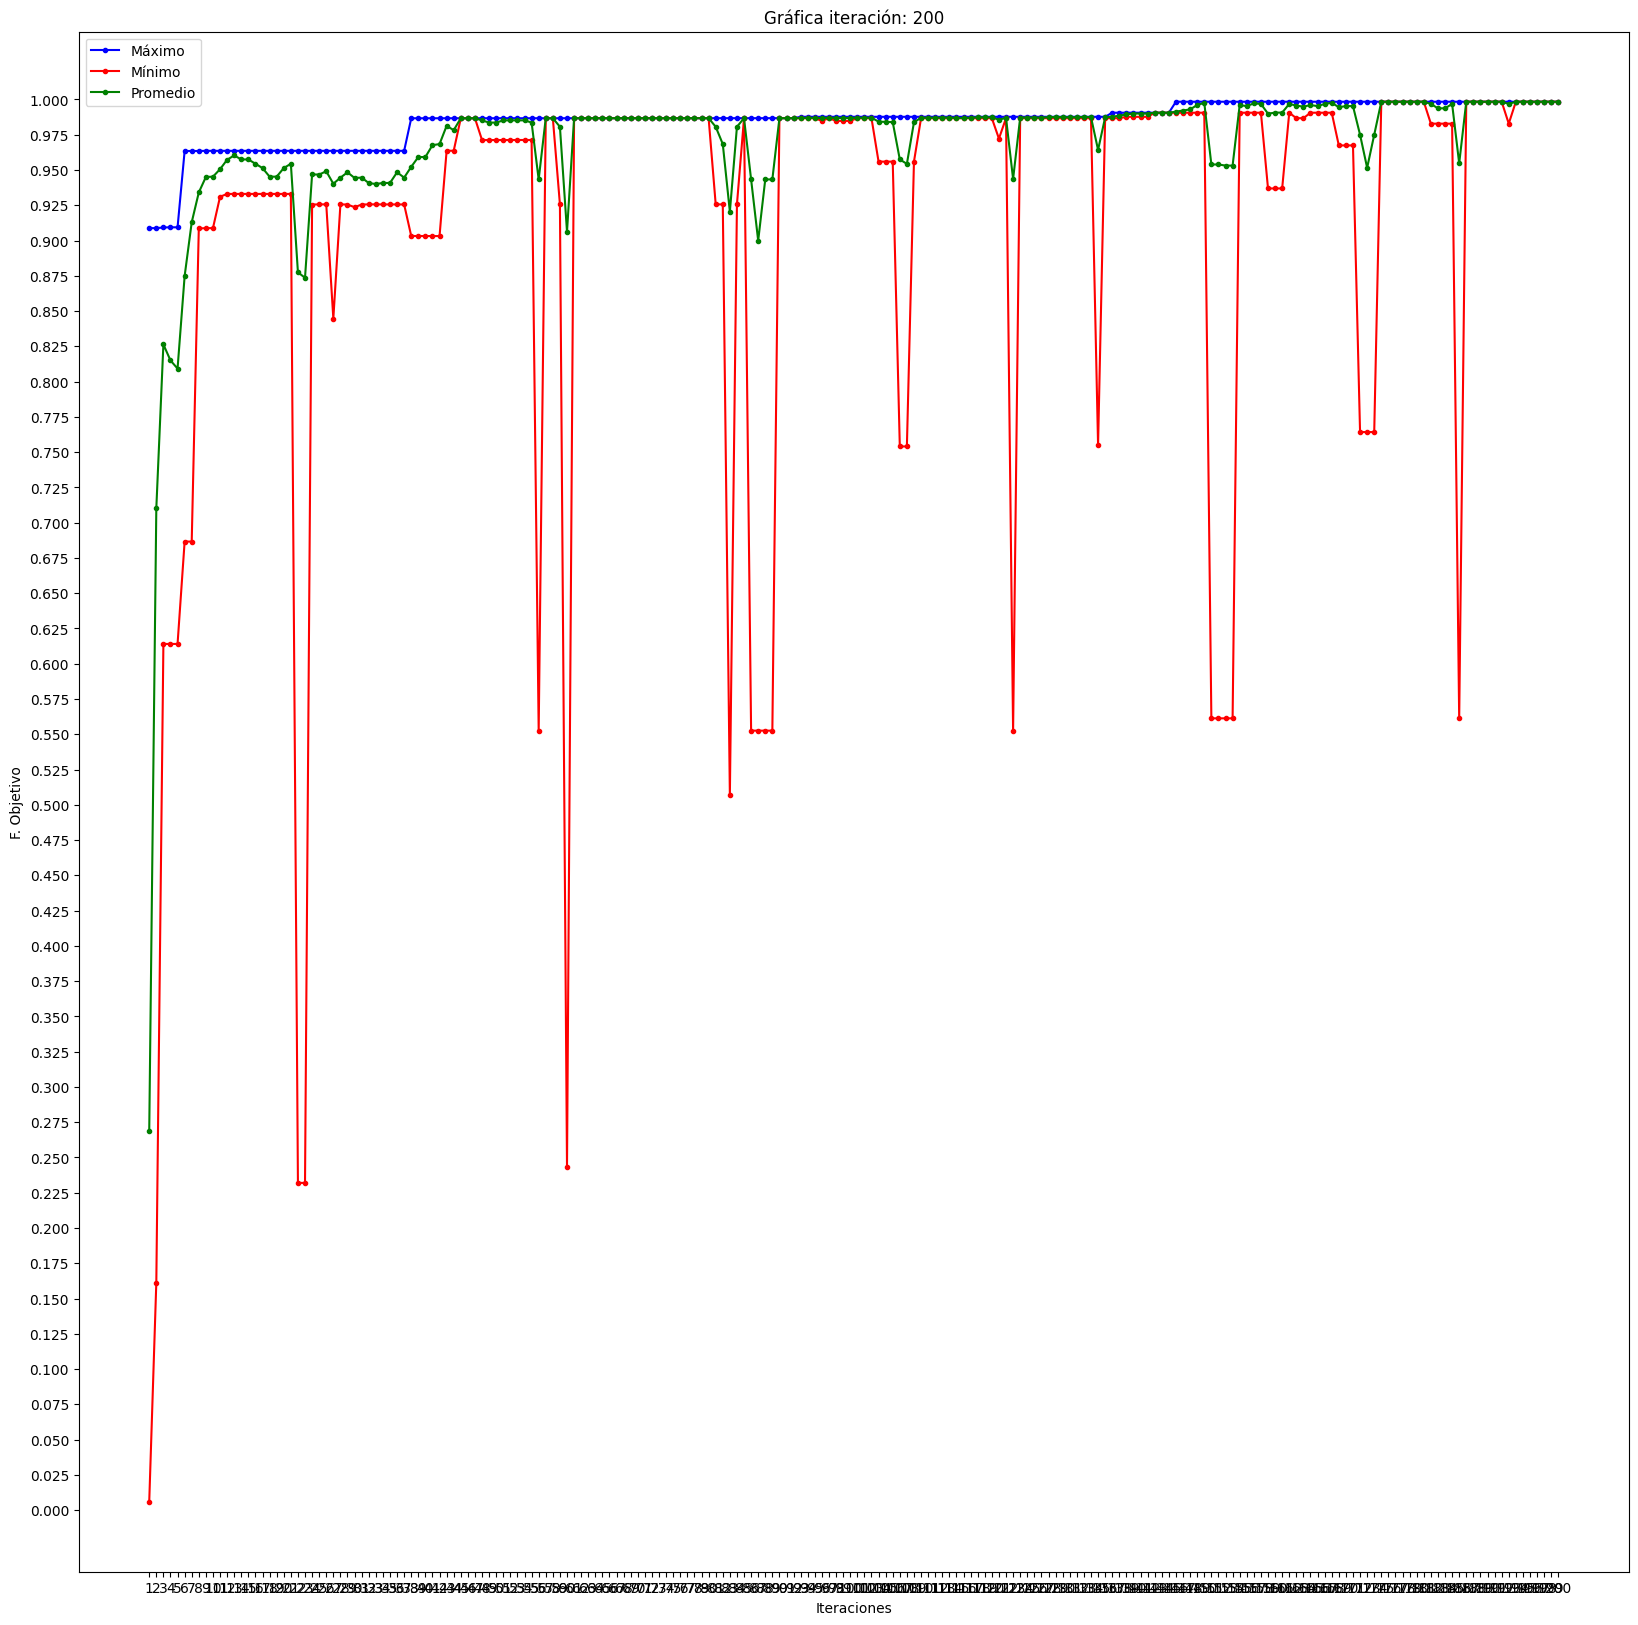

CASO C: Método selección torneo con elitismo


'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

,Suma,Promedio,Máximo,Mínimo
Función objetivo,4.709772,0.470977,0.470977,0.470977
Fitness,1.000000,0.100000,0.100000,0.100000


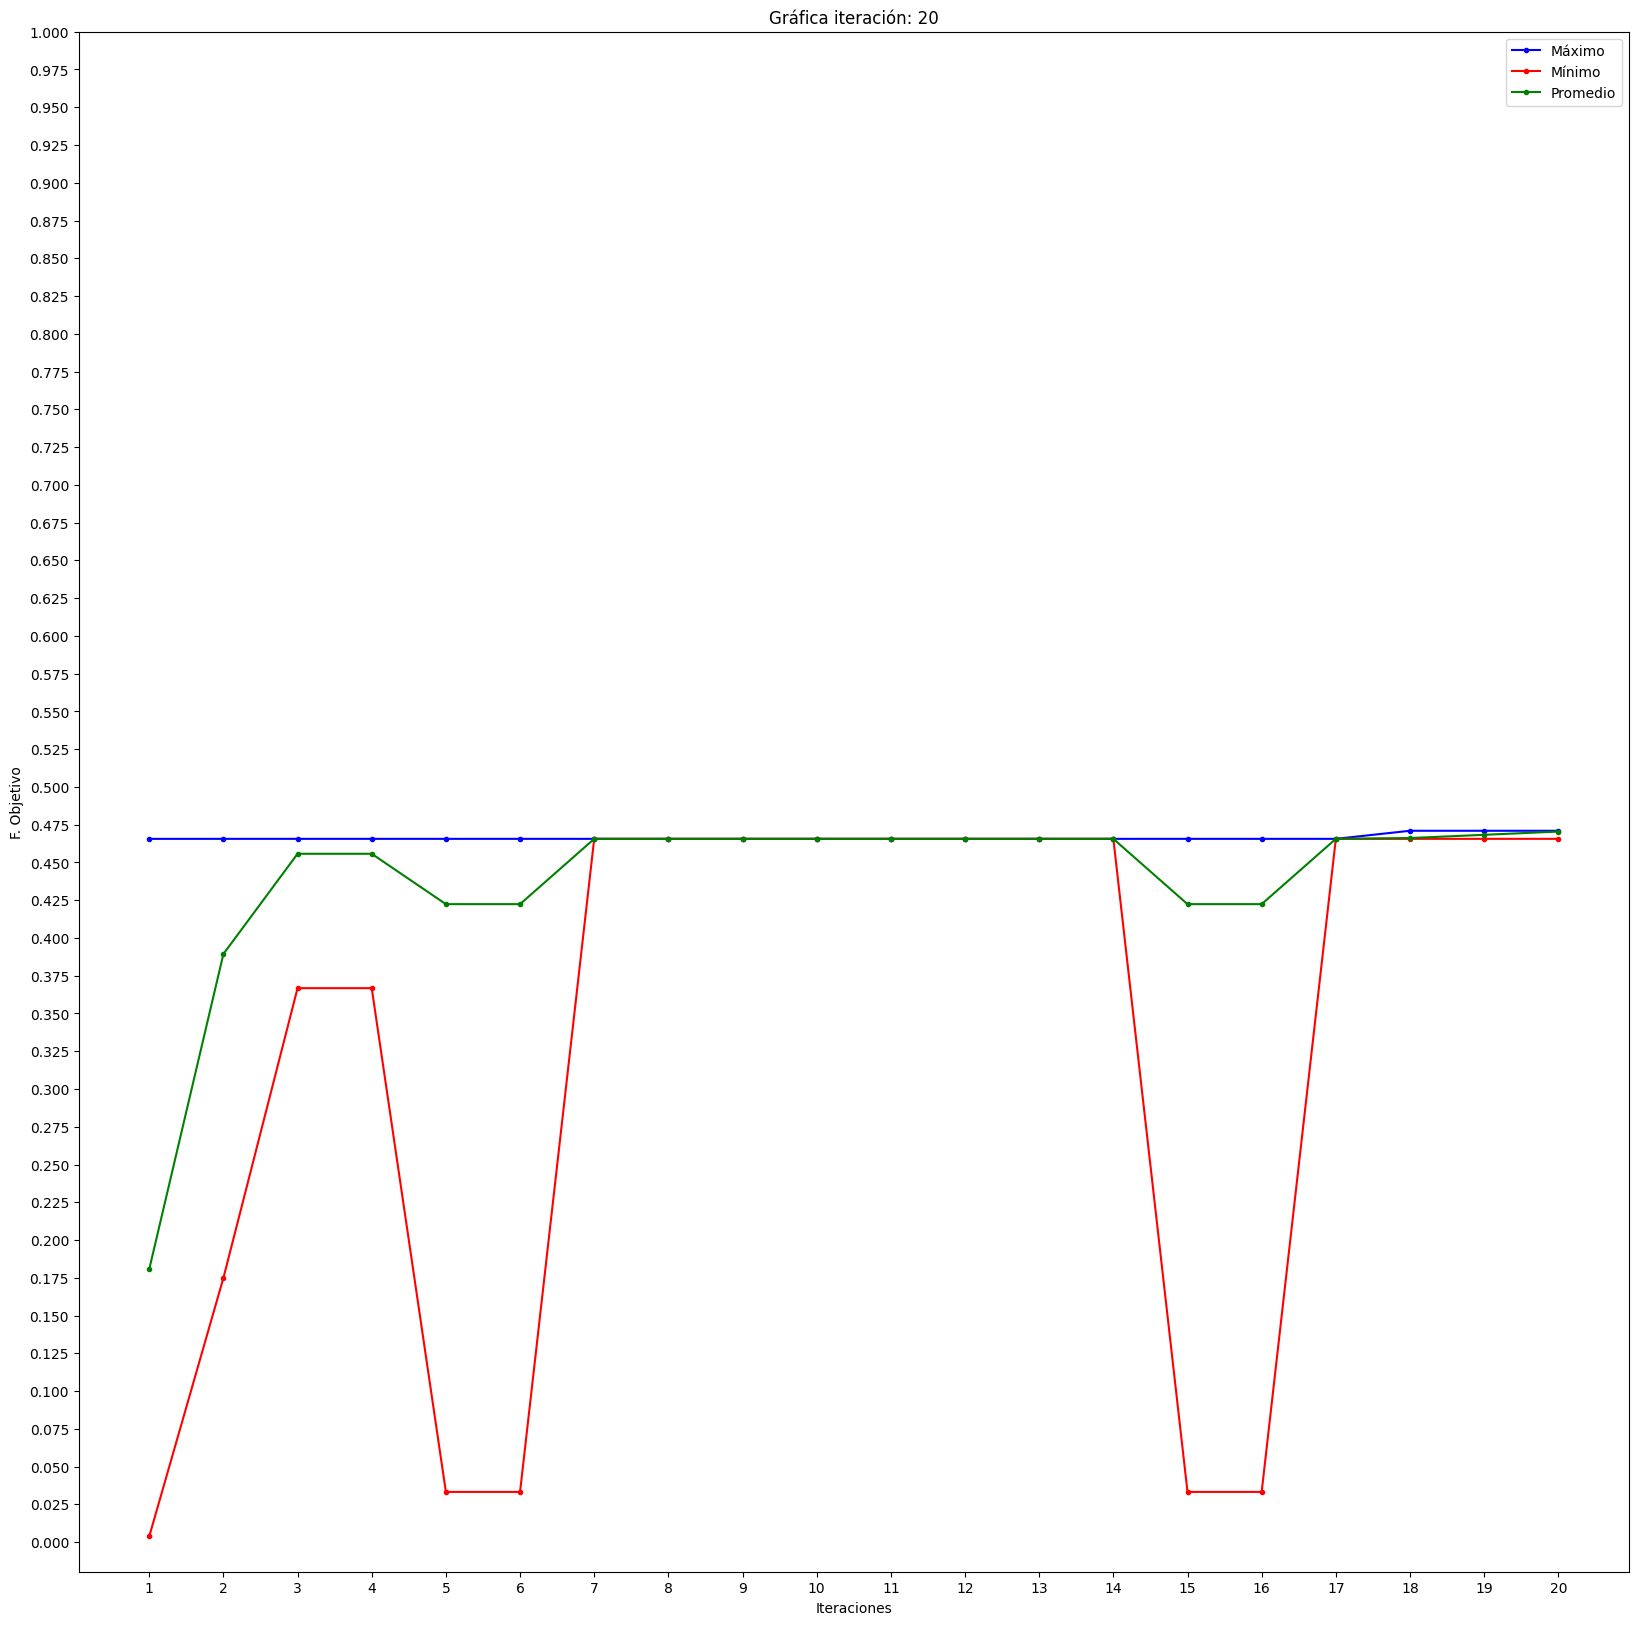

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

,Suma,Promedio,Máximo,Mínimo
Función objetivo,5.624992,0.562499,0.562499,0.562499
Fitness,1.000000,0.100000,0.100000,0.100000


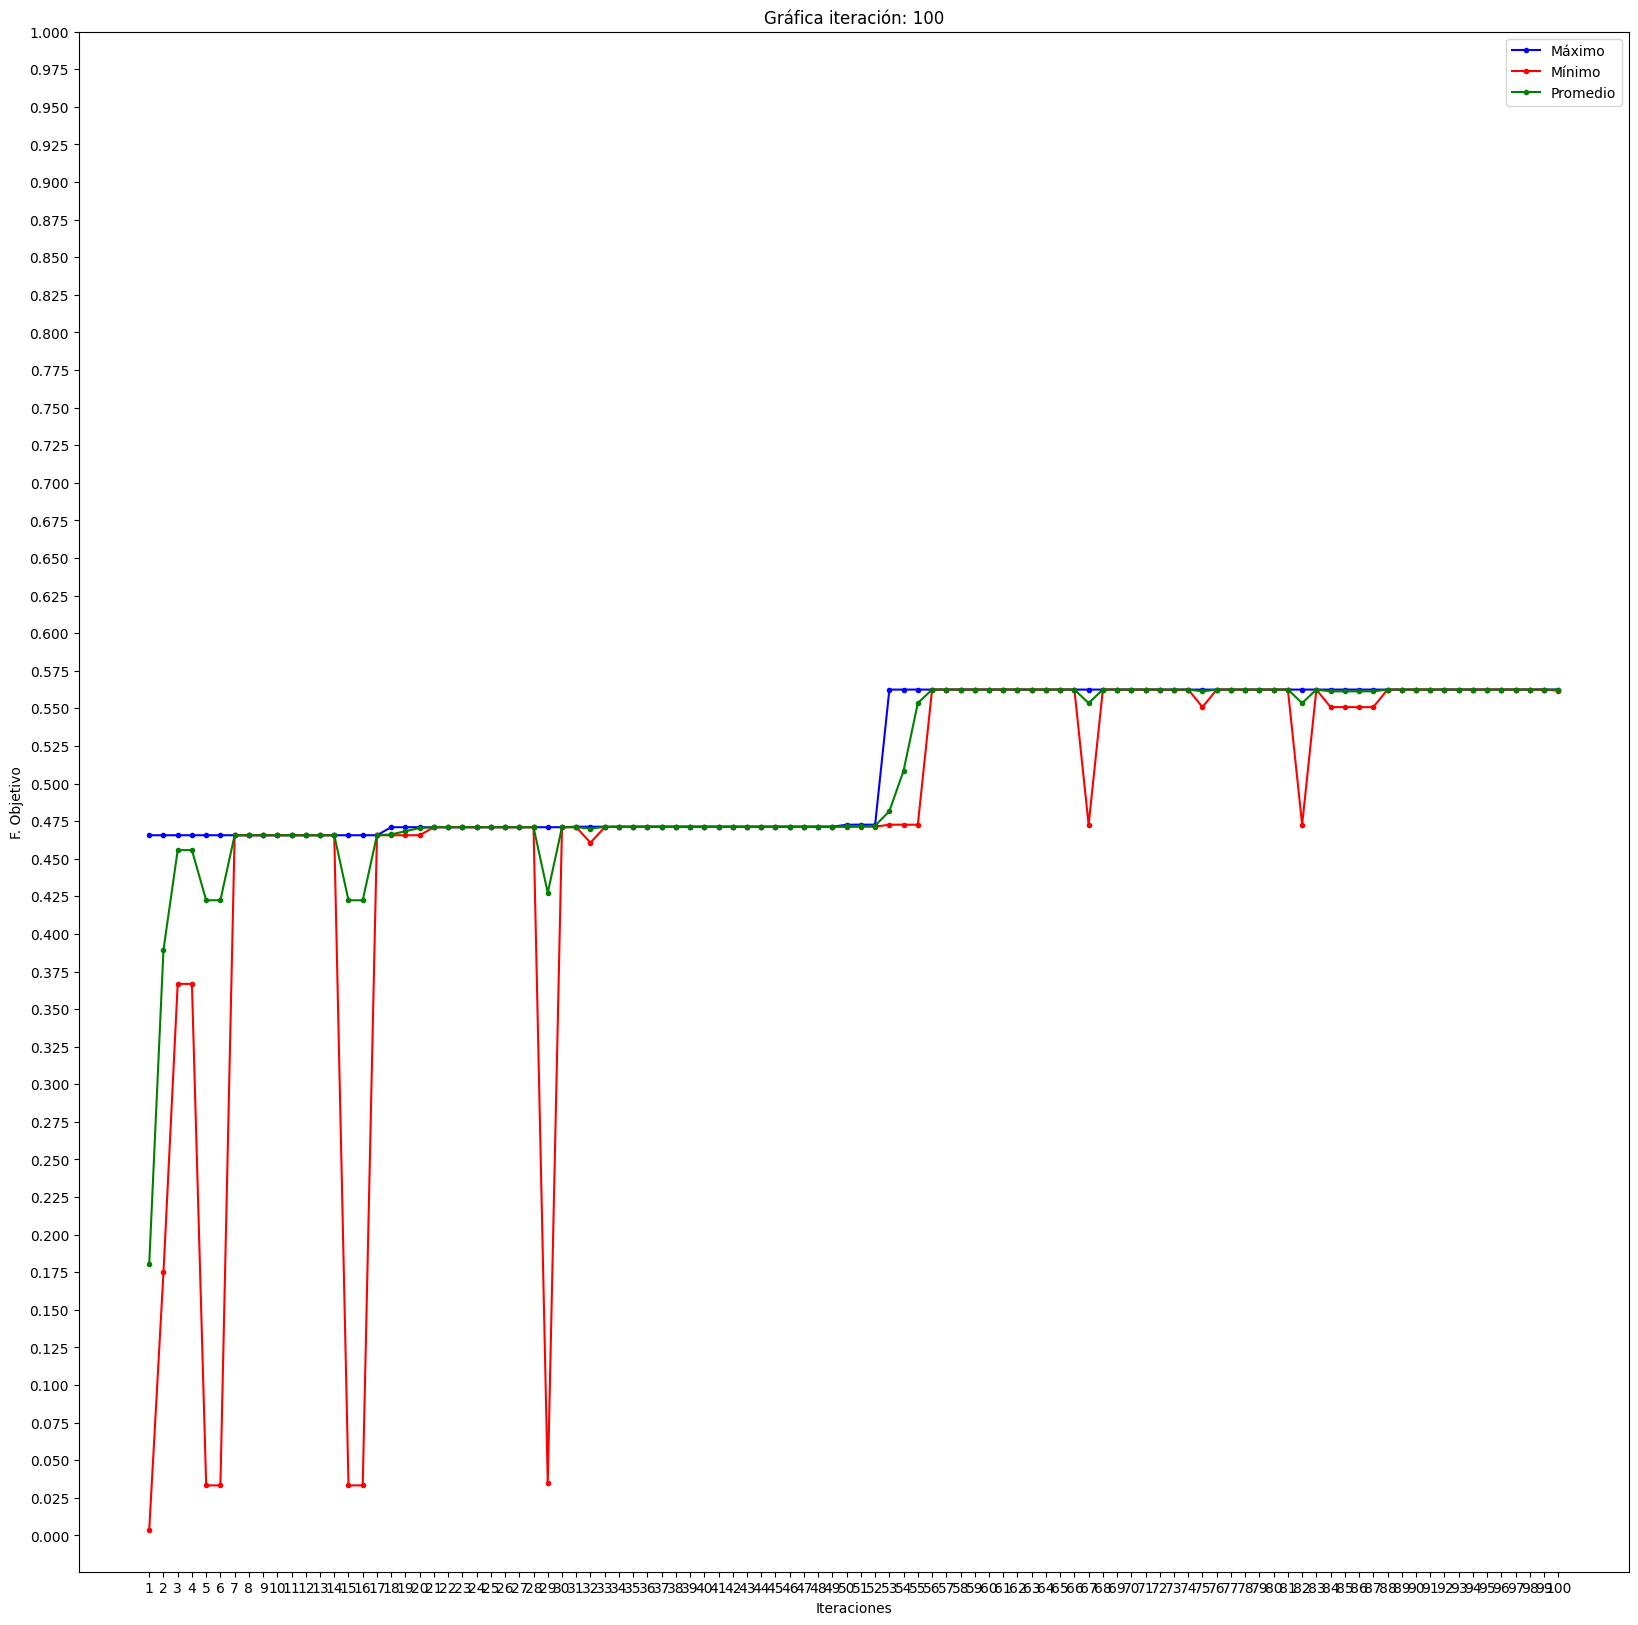

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

'----mutados elites----'

8

'----poblacion final----'

10

,Suma,Promedio,Máximo,Mínimo
Función objetivo,9.999990,0.999999,0.999999,0.999999
Fitness,1.000000,0.100000,0.100000,0.100000


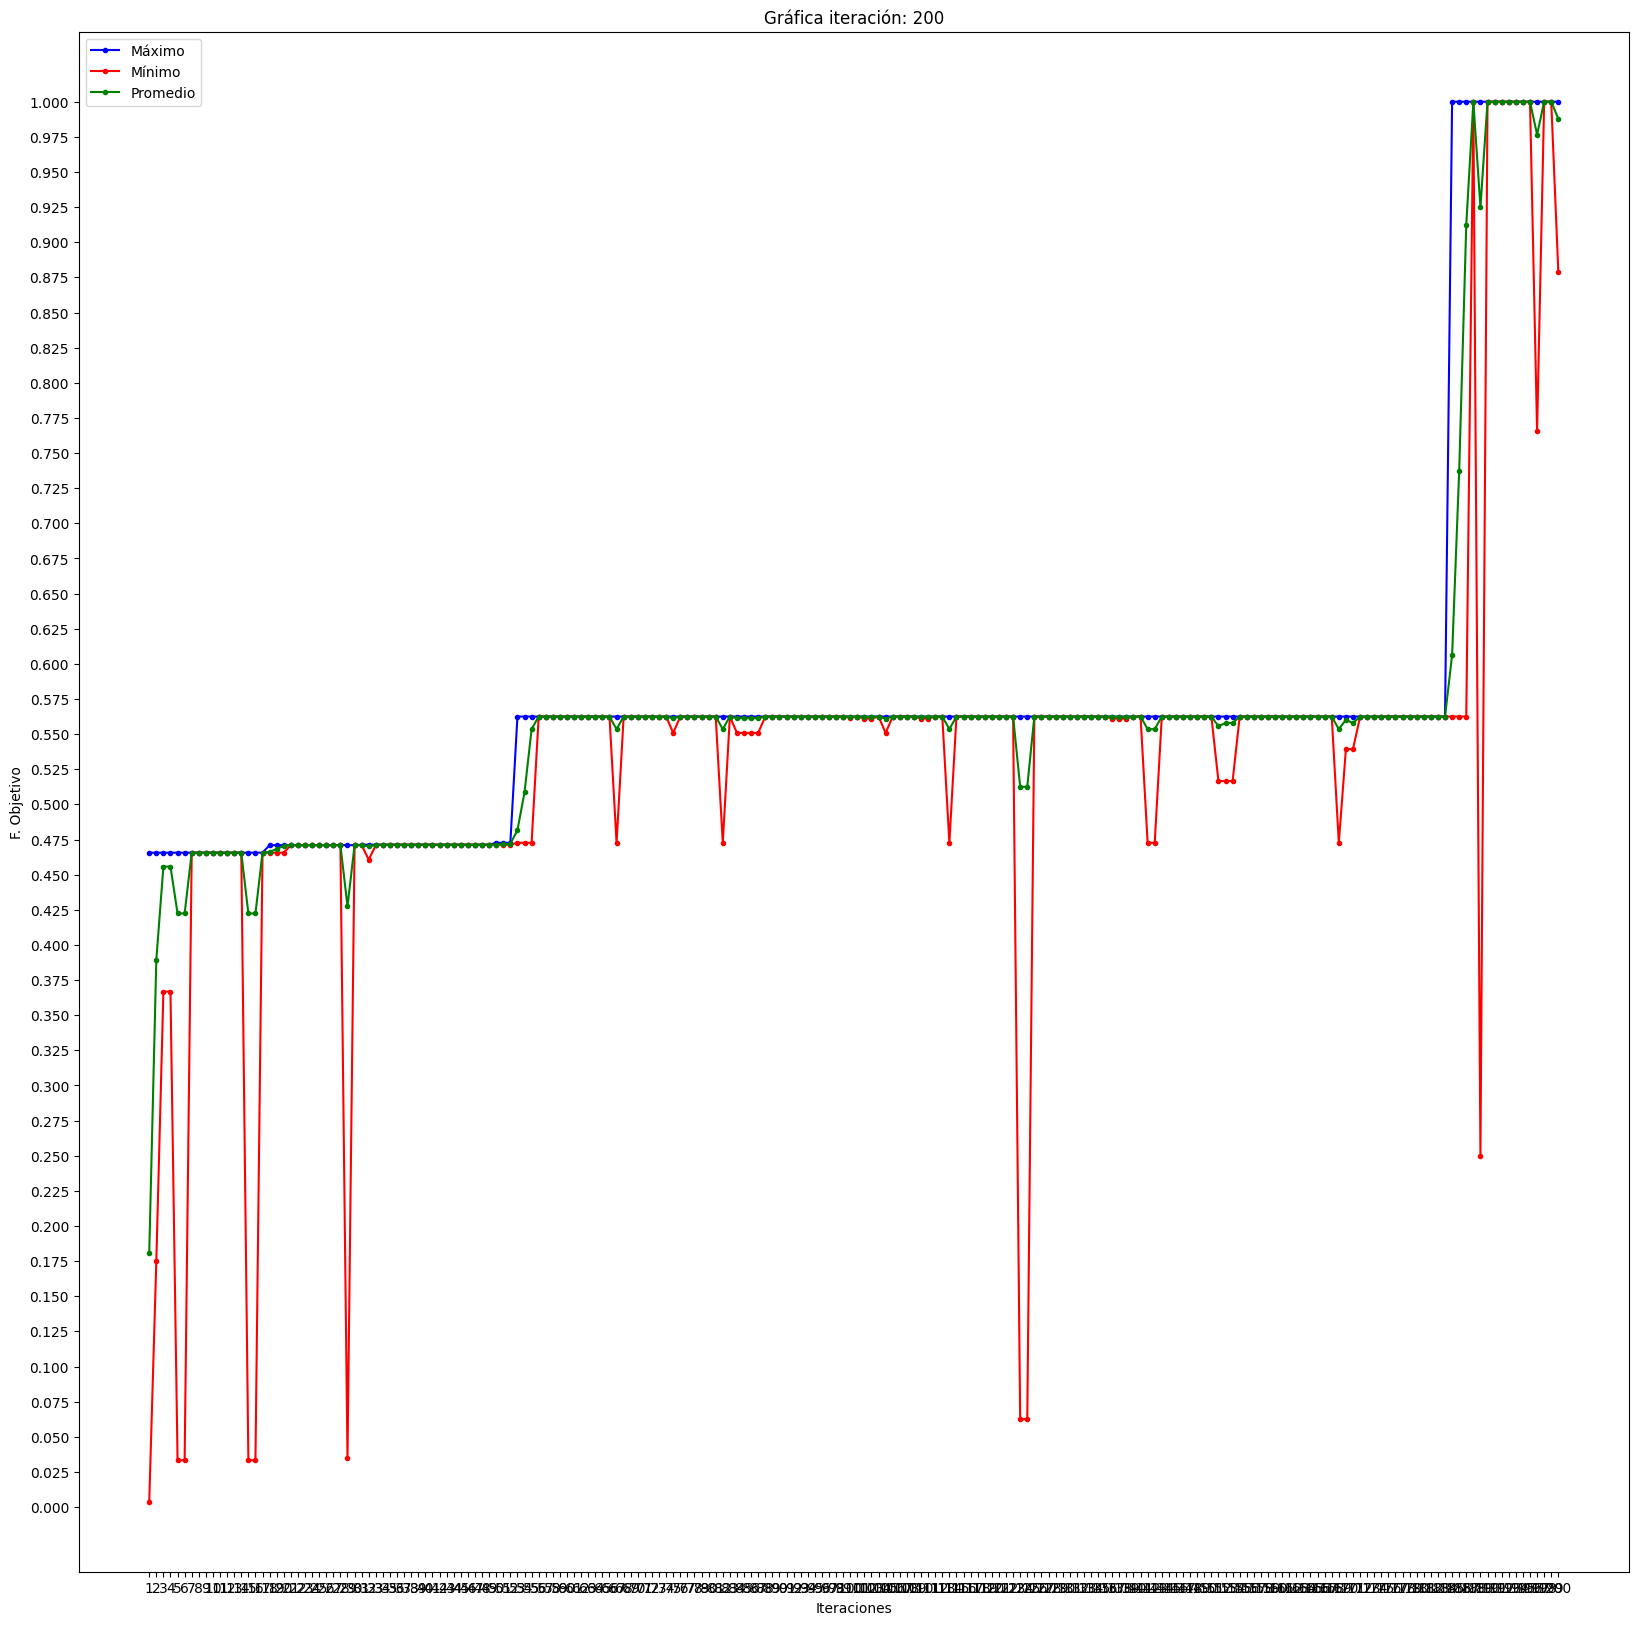

In [16]:
def main(seleccion, tieneElitismo = False, mutar = True): #TODO MOSTRAR TABLAS Y GRAFICOS, preguntar si esta bien que se hagan con los valores de fun. objetivo.
    estadisticas = { "Máximo":[], "Mínimo":[], "Promedio":[]}
    poblacion_decimal = poblacionInicial()
    poblacion_binarios = convertirPoblacion(poblacion_decimal)
    for i in range(0, CICLOS):
        marcoDeDatos = generarDataFrame(poblacion_binarios, COEF)
        marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)
        estadisticas["Máximo"].append(stats['Máximo'][0])
        estadisticas["Mínimo"].append(stats['Mínimo'][0])
        estadisticas["Promedio"].append(stats['Promedio'][0])
        if tieneElitismo:
            elites = elitismo(poblacion_binarios, 2, COEF)
            cromosomasPadres = seleccion(poblacion_binarios, COEF, 8)
        else:
            cromosomasPadres = seleccion(poblacion_binarios,COEF, 10)
        cromosomasHijos = crossover(cromosomasPadres, PROB_CROSSOVER)
        if mutar: 
            cromosomasHijosMutados = mutacion(cromosomasHijos, PROB_MUTACION)
        if tieneElitismo: 
            poblacion_binarios = cromosomasHijosMutados + elites
        else:
            poblacion_binarios = cromosomasHijosMutados

        if ( (i==(ITERACIONES_IMPRIMIBLES[0] - 1)) or (i==(ITERACIONES_IMPRIMIBLES[1] - 1)) or (i == (ITERACIONES_IMPRIMIBLES[2] - 1)) ): # 20, 100, 200. le resto 1 xq empieza en 0.
            marcoDeDatos = generarDataFrame(poblacion_binarios, COEF)
            marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)
            display(marcoDeDatos_stats.style.set_table_attributes("style='display:inline'").set_caption('Tabla iteración: ' + str(i+1)))
            hacerGrafico(estadisticas, i+1)

# opciones extra hacer mismo grafico sin mutación. (Se ve como se estanca la función en maximos locales)
print("CASO A: Método selección ruleta")
main(ruleta)
print("CASO B: Método selección torneo")
main(torneo)
print("CASO C: Método selección Ruleta con elitismo")
main(ruleta, tieneElitismo = True)
print("CASO C: Método selección torneo con elitismo")
main(torneo, tieneElitismo = True)